# <div class="alert alert-info"> 1. Overview </div>

This notebook is to conduct a fundamental techniques that apply to quantitative finance which includes:

1. Get data
2. Data Exploratory Analysis
3. Price Changes and Financial Returns: Daily Returns, Daily Percentage Return, Cumulative Returns, Simple Returns vs. Log Returns, Investment Multiple, Compound Annual Growth Rate
4. Distribution of Daily Returns
5. Time Value of Money
6. Coupon

---
# <div class="alert alert-info"> 2. Setup </div>

 ## <font color=red>2.1. Import library</font>

**Install yfinance with**:
- pip install yfinance 

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from yahoo_fin.stock_info import *
import math
from math import exp
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


 ## <font color=red>2.2. Config</font>

In [2]:
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

<ipython-input-2-f254cbd7aa4c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


---
# <div class="alert alert-info"> 3. Get Data <div>

 ## <font color=red> 3.1. Single asset: SP500

In [3]:
start = "2000-01-01"
end = "2021-01-01"

symbol = ["SPY"]
df = yf.download(symbol, start, end)

df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2000-01-03,92.4149,94.2021,91.4221,94.2021,8164300
2000-01-04,88.8009,91.5412,88.7314,91.2037,8089800
2000-01-05,88.9598,89.9328,87.2124,88.9201,12177900
2000-01-06,87.5301,89.9129,87.5301,88.7215,6227200
2000-01-07,92.6135,92.6135,88.9995,89.1584,8066500
...,...,...,...,...,...
2020-12-24,347.4525,347.4808,345.9931,346.5863,26457900
2020-12-28,350.4374,350.8329,349.4017,350.0325,39000400


 ## <font color=red>3.2.  Multiple assets

Ticker Symbols: <br>
- __BA__: Boeing (US Stock) 
- __MSFT__: Microsoft Corp (US Stock)
- __^DJI__: Dow Jones Industrial Average (US Stock Index)
- __EURUSD=X__: Exchange Rate for Currency Pair EUR/USD (Forex)
- __GC=F__: Gold Price (Precious Metal / Commodity)
- __BTC-USD__: Bitcoin in USD (Cryptocurrency)

aapl(Apple), wmt(Walmart), ge(GE), amzn(Amazon), ibm

In [4]:
start = "2014-10-01"
end = "2021-05-31"
# initialize parameters 
#start = datetime(2020, 1, 1) 
#start = datetime(2021, 1, 1) 

symbol = ["BA", "MSFT", "WMT", "AAPL", "^DJI", "GC=F", "BTC-USD"]
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  7 of 7 completed


Price         Close                                                            \
Ticker         AAPL       BA    BTC-USD      GC=F     MSFT     WMT       ^DJI   
Date                                                                            
2014-10-01  21.9673 108.4067   383.6150 1214.6000  39.0886 20.6006 16804.7109   
2014-10-02  22.1268 107.9719   375.0720 1214.2000  38.9694 20.6304 16801.0508   
2014-10-03  22.0648 109.8762   359.5120 1192.2000  39.2504 20.9254 17009.6895   
2014-10-04      NaN      NaN   328.8660       NaN      NaN     NaN        NaN   
2014-10-05      NaN      NaN   320.5100       NaN      NaN     NaN        NaN   
...             ...      ...        ...       ...      ...     ...        ...   
2021-05-26 124.3006 241.3700 39294.1992 1901.3000 243.7286 44.9400 34323.0508   
2021-05-27 122.7621 250.7000 38436.9688 1895.7000 241.6158 44.7882 34464.6406   
2021-05-28 122.1056 247.0200 35697.6055 1902.5000 241.9744 44.8957 34529.4492   
2021-05-29      NaN      NaN 34616.0664       NaN      NaN     NaN        NaN   
2021-05-30      NaN      NaN 35678.1289       NaN      NaN     NaN        NaN   

Price          High                      ...     Open                     \
Ticker         AAPL       BA    BTC-USD  ...     MSFT     WMT       ^DJI   
Date                                     ...                               
2014-10-01  22.3018 110.7545   391.3790  ...  39.4037 20.7062 17040.4609   
2014-10-02  22.1977 109.1719   385.4970  ...  39.0290 20.6250 16808.2695   
2014-10-03  22.1954 110.3197   377.6950  ...  39.1567 20.7224 16802.1992   
2014-10-04      NaN      NaN   364.4870  ...      NaN     NaN        NaN   
2014-10-05      NaN      NaN   341.8010  ...      NaN     NaN        NaN   
...             ...      ...        ...  ...      ...     ...        ...   
2021-05-26 124.8297 242.4900 40782.0781  ... 243.6705 45.0095 34336.3398   
2021-05-27 125.0747 252.6000 40379.6172  ... 243.4184 45.3130 34432.4688   
2021-05-28 123.2717 248.9800 38856.9688  ... 243.2537 44.8641 34558.5000   
2021-05-29      NaN      NaN 37234.5000  ...      NaN     NaN        NaN   
2021-05-30      NaN      NaN 36400.6680  ...      NaN     NaN        NaN   

Price              Volume                                         \
Ticker               AAPL            BA      BTC-USD        GC=F   
Date                                                               
2014-10-01 205965200.0000  5265200.0000     26229400    178.0000   
2014-10-02 191031200.0000  3204500.0000     21777700    176.0000   
2014-10-03 173878400.0000  3075900.0000     30901200    499.0000   
2014-10-04            NaN           NaN     47236500         NaN   
2014-10-05            NaN           NaN     83308096         NaN   
...                   ...           ...          ...         ...   
2021-05-26  56575900.0000  7240200.0000  51346735160 170526.0000   
2021-05-27  94625600.0000 18404400.0000  43210968721  35794.0000   
2021-05-28  71311100.0000 11197400.0000  55200191952   2415.0000   
2021-05-29            NaN           NaN  45231013335         NaN   
2021-05-30            NaN           NaN  31646080921         NaN   

Price                                                  
Ticker              MSFT           WMT           ^DJI  
Date                                                   
2014-10-01 38088400.0000 19574700.0000 104240000.0000  
2014-10-02 25119400.0000 14763600.0000  75490000.0000  
2014-10-03 32453200.0000 17459100.0000  87940000.0000  
2014-10-04           NaN           NaN            NaN  
2014-10-05           NaN           NaN            NaN  
...                  ...           ...            ...  
2021-05-26 17771600.0000 19294200.0000 258780000.0000  
2021-05-27 24426200.0000 56577000.0000 520630000.0000  
2021-05-28 18270200.0000 21186300.0000 290850000.0000  
2021-05-29           NaN           NaN            NaN  
2021-05-30           NaN           NaN            NaN  

[2434 rows x 35 columns]

In [5]:
df.to_csv("multi_assets.csv")

---
---
# <div class="alert alert-info"> 4. Data Exploration <div>

 ## <font color=red> 4.1. Single asset: SP500

In [18]:
df = pd.read_csv("Data/sp500.csv", index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.2500,148.2500,143.8750,145.4375,96.1398,8164300
2000-01-04,143.5312,144.0625,139.6406,139.7500,92.3802,8089800
2000-01-05,139.9375,141.5312,137.2500,140.0000,92.5454,12177900
2000-01-06,139.6250,141.5000,137.7500,137.7500,91.0580,6227200
2000-01-07,140.3125,145.7500,140.0625,145.7500,96.3464,8066500


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5284 entries, 2000-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5284 non-null   float64
 1   High       5284 non-null   float64
 2   Low        5284 non-null   float64
 3   Close      5284 non-null   float64
 4   Adj Close  5284 non-null   float64
 5   Volume     5284 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 289.0 KB


 ### <font color=blue> 1.  Visualize data

**Plot the Closing price of the SP500**

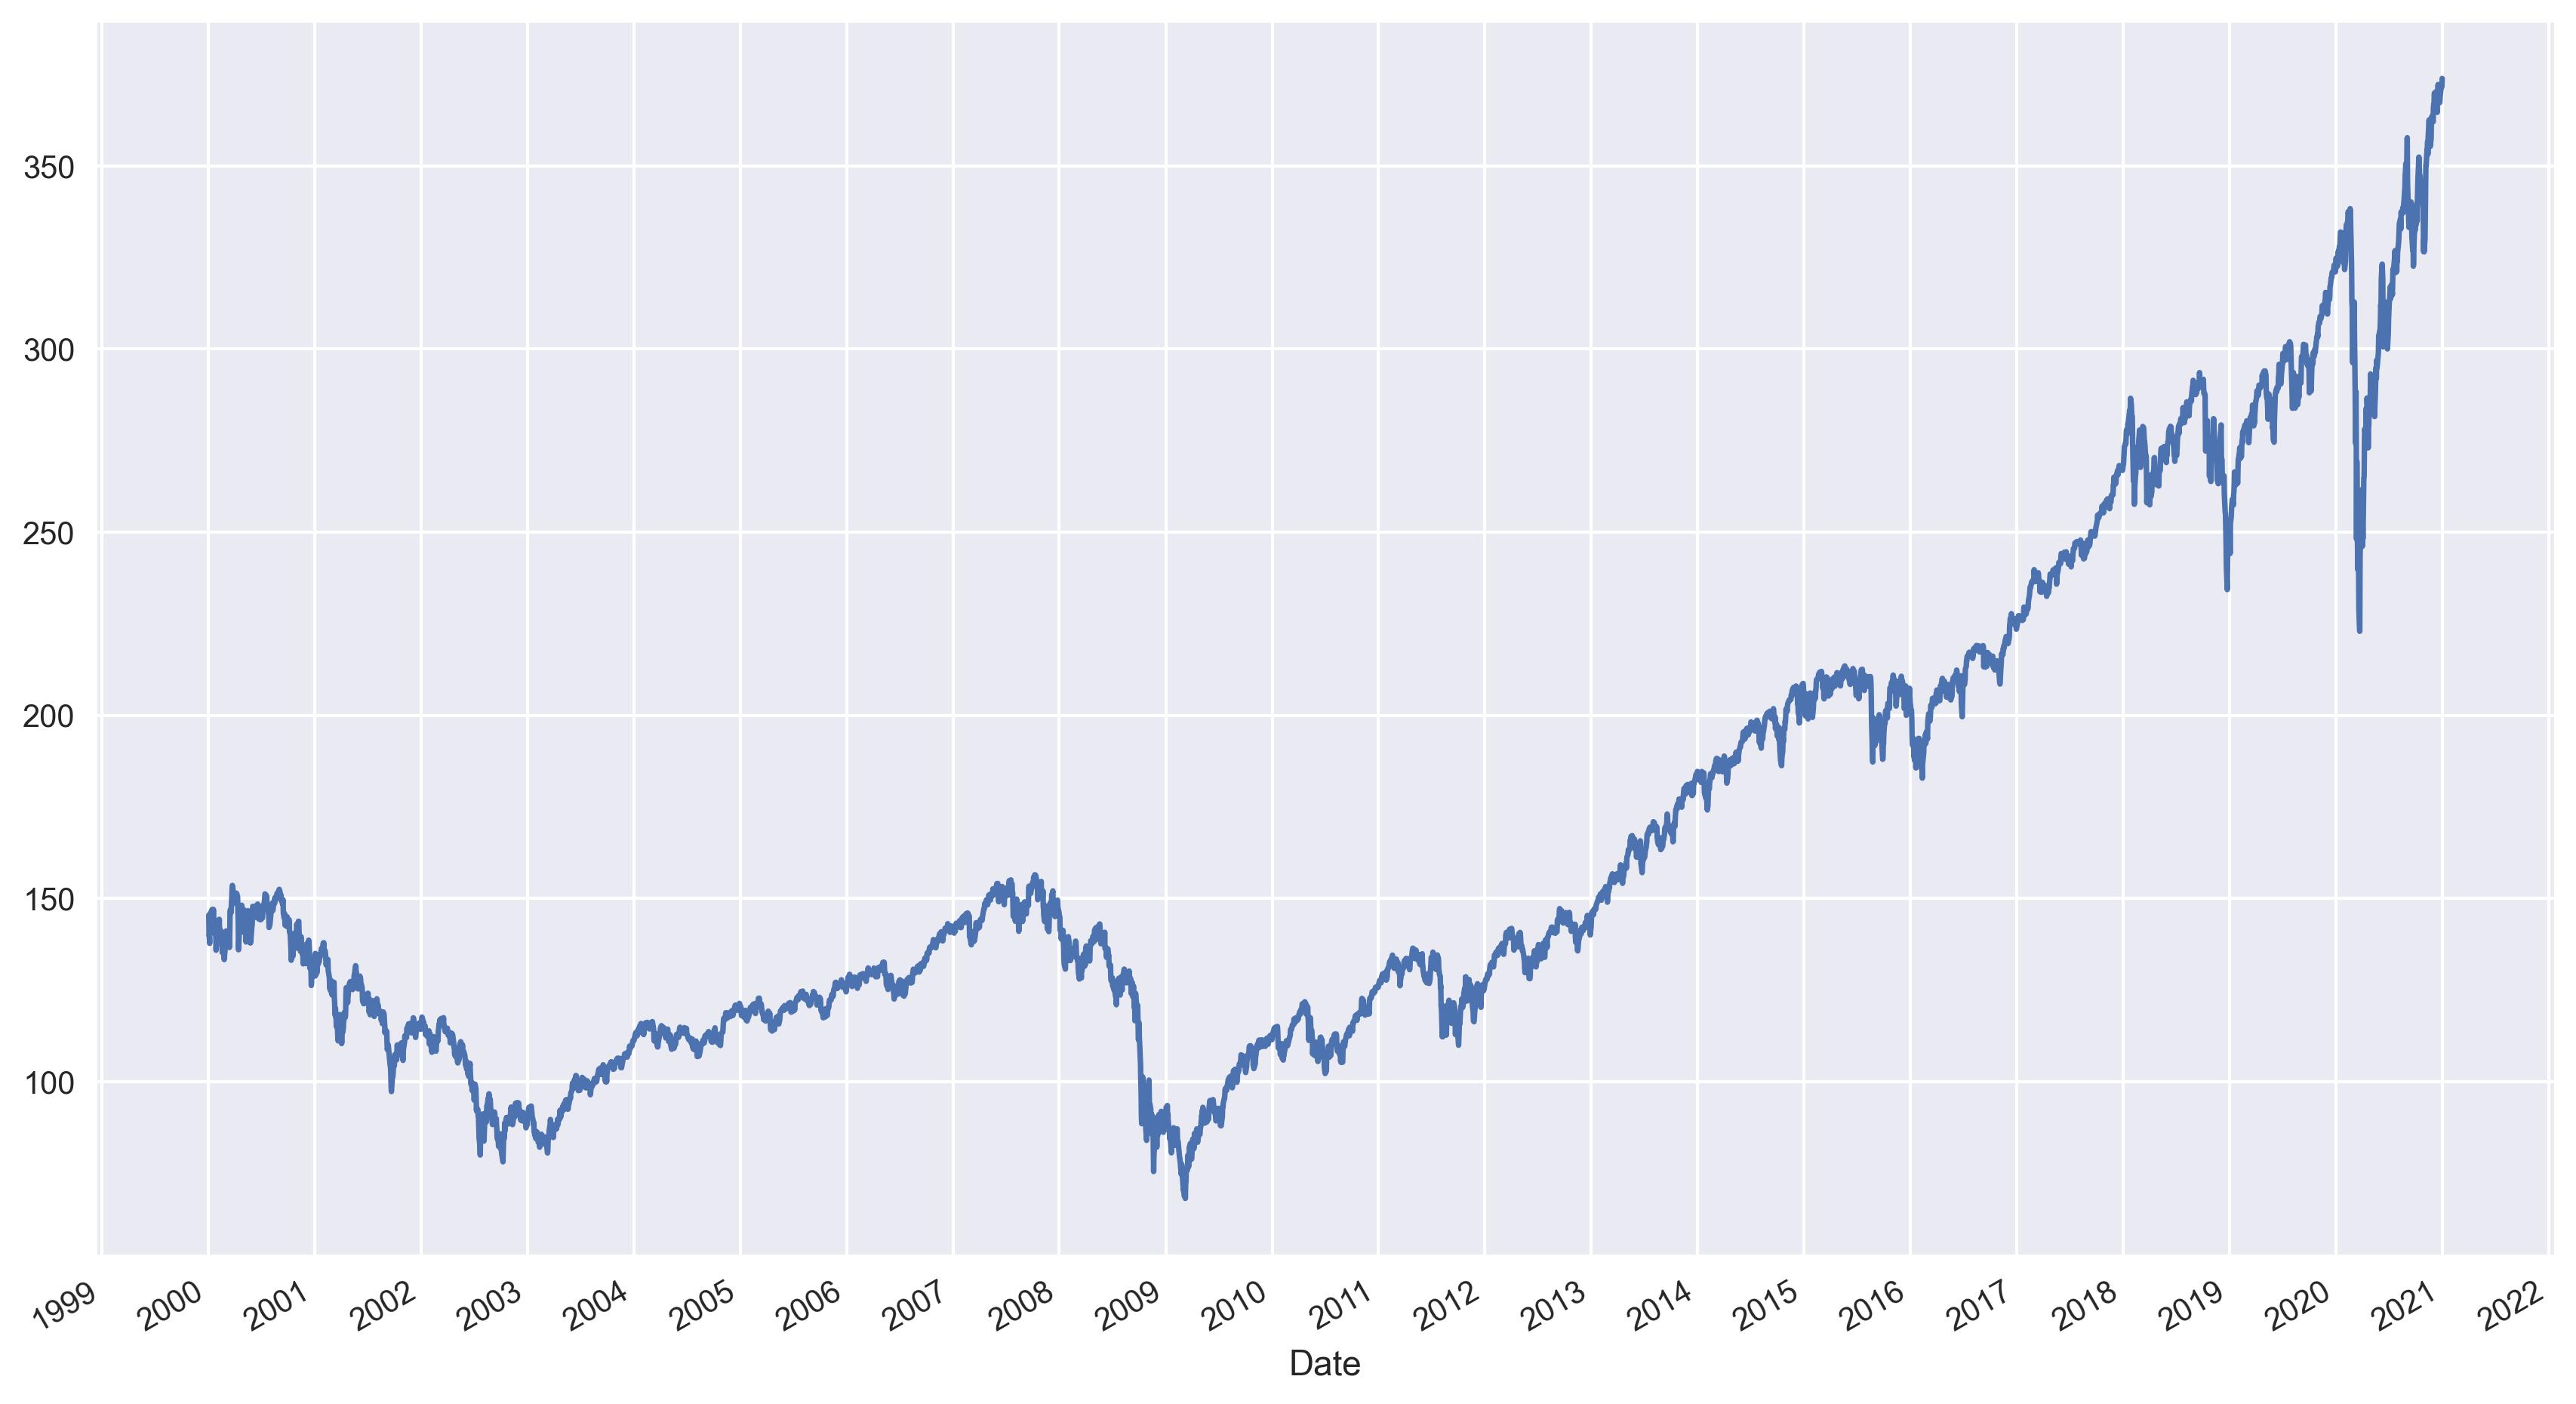

In [20]:
from matplotlib import dates

plt.figure(figsize=(14,8), dpi=300)
ax = df['Close'].plot()

# Use Locator() and Formatter() methods to configure the plot x axis so that it displayes a tick for every year in the dataset
ax.xaxis.set_major_locator(dates.YearLocator())

# Only showing the year number, not full YYYY-MM-DD that is the default
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

plt.savefig("sp500.png")

**Create a histogram of the daily volume of shares of SPY traded**

<Axes: >

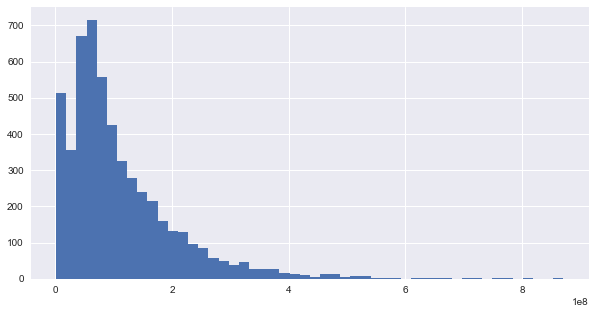

In [21]:
df["Volume"].hist(bins=50, figsize=(10,5))

**Explore the crash and recovery of 2020 due to the COVID pandemic**

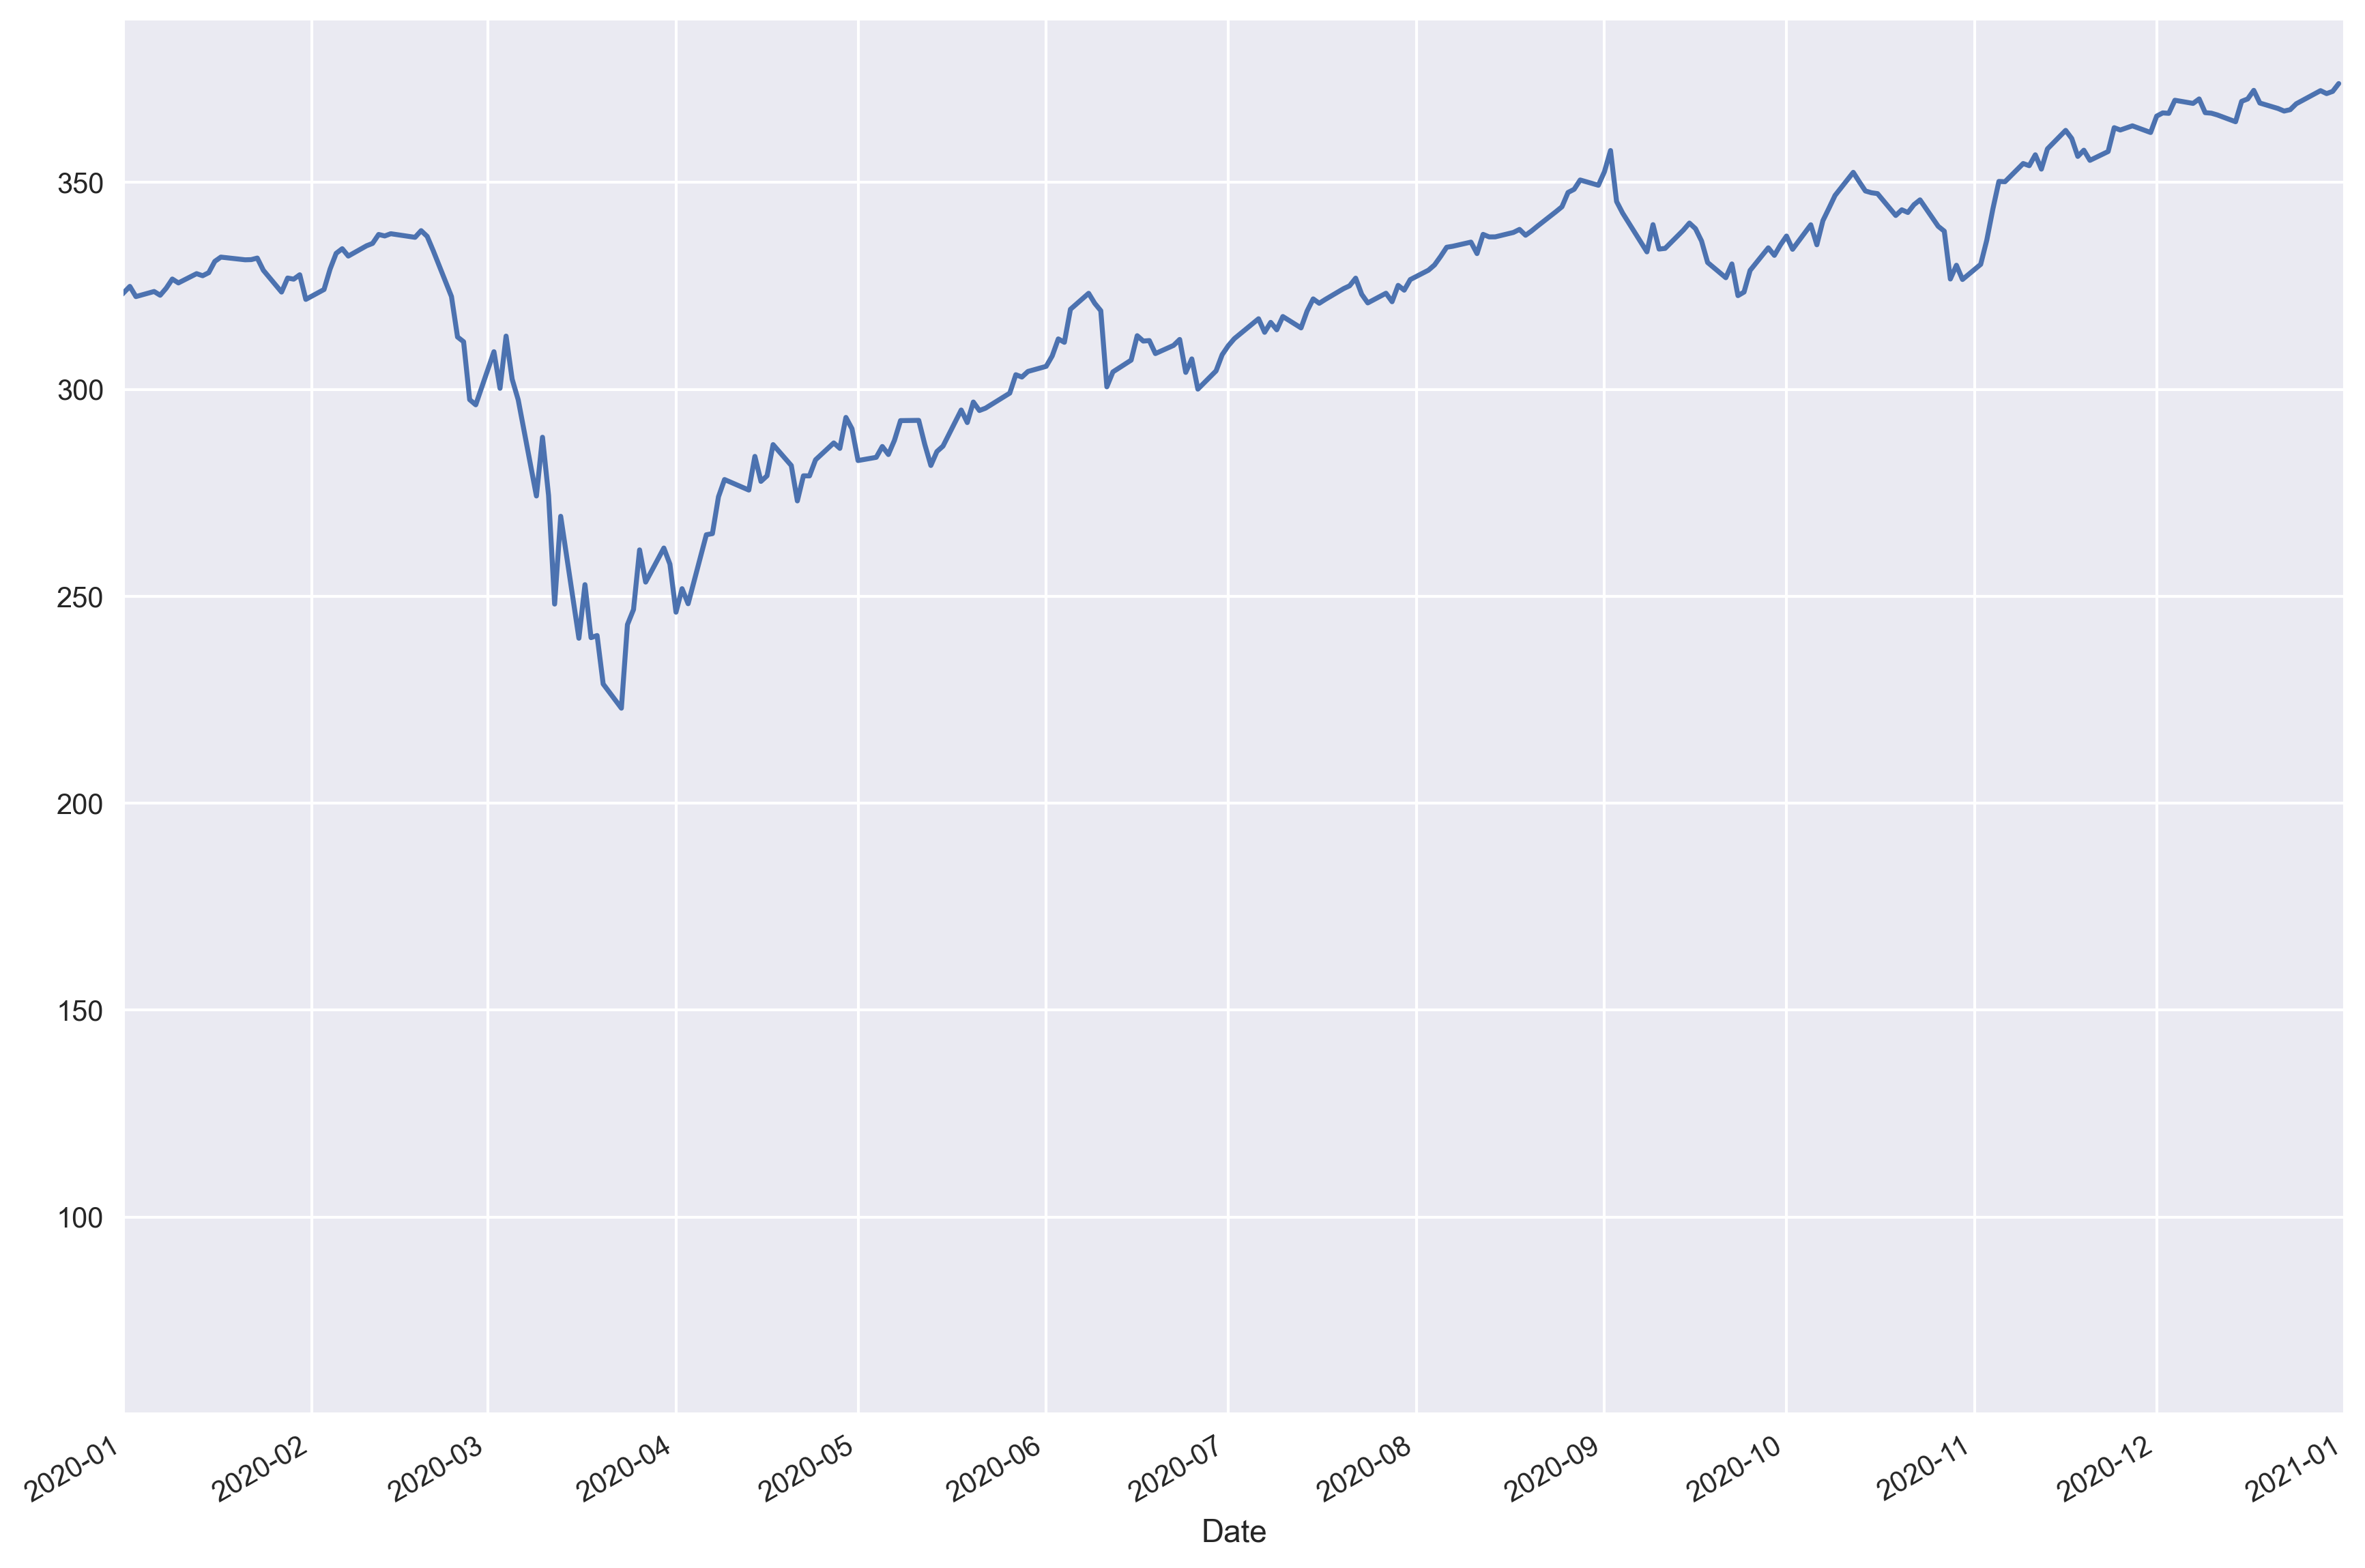

In [22]:
from matplotlib import dates

plt.figure(figsize=(14,10), dpi=300)
ax = df['Close'].plot(xlim=["2020-01-01", "2021-01-01"])
ax.xaxis.set_major_locator(dates.MonthLocator())

**Trend line of the corresponding 100 days rolling mean** 

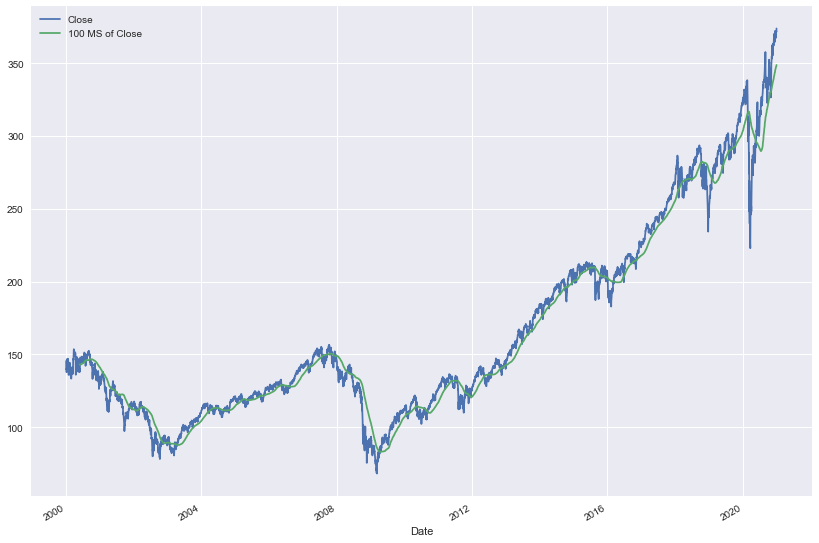

In [23]:
plt.figure(figsize=(14,10))
df['Close'].plot(label='Close')
df['Close'].rolling(100).mean().plot(label="100 MS of Close")
plt.legend()

 ### <font color=blue> 2. Financial Performance Analysis

**Calculate absolute earn or loss over time (from start to end)**

In [24]:
df.iloc[-1]["Close"] - df.iloc[0]["Close"]

228.4425048828125

**Calculate the percent increase (or decrease) in value from start to end ?**

In [25]:
100 * (df.iloc[-1]["Close"] - df.iloc[0]["Close"]) / df.iloc[0]["Close"]

157.07262905565105

**Return the 10 dates with the largest gain for the SPY**

In [26]:
df['Close'].pct_change(1).sort_values(ascending=False).head(10)

Date
2008-10-13   0.1452
2008-10-28   0.1169
2020-03-24   0.0906
2020-03-13   0.0855
2009-03-23   0.0718
2008-11-24   0.0693
2020-04-06   0.0672
2008-11-13   0.0623
2008-10-20   0.0601
2002-07-24   0.0597
Name: Close, dtype: float64

**the 10 dates with the highest daily percent change from the previous day (either gain OR decrease)**

In [27]:
df['Close'].pct_change(1).abs().sort_values(ascending=False).head(10)

Date
2008-10-13   0.1452
2008-10-28   0.1169
2020-03-16   0.1094
2008-10-15   0.0984
2020-03-12   0.0957
2020-03-24   0.0906
2008-12-01   0.0886
2020-03-13   0.0855
2008-09-29   0.0784
2020-03-09   0.0781
Name: Close, dtype: float64

**For each year in the dataset, find the Minumim/Maximum Close price that SPY reached for that year.**

In [28]:
df["Close"].resample("Y").min()

Date
2000-12-31   126.2500
2001-12-31    97.2800
2002-12-31    78.1000
2003-12-31    80.5200
2004-12-31   106.8500
2005-12-31   113.8000
2006-12-31   122.5500
2007-12-31   137.3500
2008-12-31    75.4500
2009-12-31    68.1100
2010-12-31   102.2000
2011-12-31   109.9300
2012-12-31   127.5000
2013-12-31   145.5500
2014-12-31   174.1700
2015-12-31   187.2700
2016-12-31   182.8600
2017-12-31   225.2400
2018-12-31   234.3400
2019-12-31   244.2100
2020-12-31   222.9500
Freq: A-DEC, Name: Close, dtype: float64

In [29]:
df["Close"].resample("Y").max()

Date
2000-12-31   153.5625
2001-12-31   137.9300
2002-12-31   117.6200
2003-12-31   111.2800
2004-12-31   121.3600
2005-12-31   127.8100
2006-12-31   143.1200
2007-12-31   156.4800
2008-12-31   144.9300
2009-12-31   112.7200
2010-12-31   125.9200
2011-12-31   136.4300
2012-12-31   147.2400
2013-12-31   184.6900
2014-12-31   208.7200
2015-12-31   213.5000
2016-12-31   227.7600
2017-12-31   268.2000
2018-12-31   293.5800
2019-12-31   322.9400
2020-12-31   373.8800
Freq: A-DEC, Name: Close, dtype: float64

**What was the day with the lowest closing price in 2020? (and what was this price)** 

In [30]:
df.loc["2020"]["Close"].idxmin()

Timestamp('2020-03-23 00:00:00')

In [31]:
df.loc["2020"]["Close"].min()

222.9499969482422

**In 2020, due to the uncertainty of the COVID-19 pandemic, the S&P500 index experienced a large drop in March of 2020. What was the highest price reached in 2020 *before* April 1st, 2020.**

In [32]:
highest_price_date = df.loc["2020-01-01":"2020-04-01"]["Close"].idxmax()
highest_price_date

Timestamp('2020-02-19 00:00:00')

In [33]:
first_peak_price = df.loc["2020-01-01":"2020-04-01"]["Close"].max()
first_peak_price

338.3399963378906

**Due to central bank and government actions, the S&P500 had one of the quickest recoveries in history after the crash of March 2020. How long did it take (in days) to reach the peak price the S&P 500 was at before the crash in March? In other words, based on your previous task of finding the peak price before the crash, how long did it take for the market to recover to its pre-crash price level?**

In [34]:
df_after_crash = df.loc["2020-04-01":]["Close"]
df_after_crash[df_after_crash > first_peak_price]

Date
2020-08-18   338.6400
2020-08-21   339.4800
2020-08-24   342.9200
2020-08-25   344.1200
2020-08-26   347.5700
               ...   
2020-12-24   369.0000
2020-12-28   372.1700
2020-12-29   371.4600
2020-12-30   371.9900
2020-12-31   373.8800
Name: Close, Length: 71, dtype: float64

In [35]:
df_after_crash[df_after_crash > first_peak_price].iloc[0]

338.6400146484375

In [36]:
highest_price_date

Timestamp('2020-02-19 00:00:00')

In [37]:
df_after_crash[df_after_crash > first_peak_price].index[0] - highest_price_date

Timedelta('181 days 00:00:00')

 ## <font color=red> 4.2. Multiple Assets

In [38]:
df = pd.read_csv("multi_assets.csv", header = [0, 1], index_col = 0, parse_dates = [0])
df

Price         Close                                                            \
Ticker         AAPL       BA    BTC-USD      GC=F     MSFT     WMT       ^DJI   
Date                                                                            
2014-10-01  21.9673 108.4067   383.6150 1214.6000  39.0886 20.6006 16804.7109   
2014-10-02  22.1268 107.9719   375.0720 1214.2000  38.9694 20.6304 16801.0508   
2014-10-03  22.0648 109.8762   359.5120 1192.2000  39.2504 20.9254 17009.6895   
2014-10-04      NaN      NaN   328.8660       NaN      NaN     NaN        NaN   
2014-10-05      NaN      NaN   320.5100       NaN      NaN     NaN        NaN   
...             ...      ...        ...       ...      ...     ...        ...   
2021-05-26 124.3006 241.3700 39294.1992 1901.3000 243.7286 44.9400 34323.0508   
2021-05-27 122.7621 250.7000 38436.9688 1895.7000 241.6158 44.7882 34464.6406   
2021-05-28 122.1056 247.0200 35697.6055 1902.5000 241.9744 44.8957 34529.4492   
2021-05-29      NaN      NaN 34616.0664       NaN      NaN     NaN        NaN   
2021-05-30      NaN      NaN 35678.1289       NaN      NaN     NaN        NaN   

Price          High                      ...     Open                     \
Ticker         AAPL       BA    BTC-USD  ...     MSFT     WMT       ^DJI   
Date                                     ...                               
2014-10-01  22.3018 110.7545   391.3790  ...  39.4037 20.7062 17040.4609   
2014-10-02  22.1977 109.1719   385.4970  ...  39.0290 20.6250 16808.2695   
2014-10-03  22.1954 110.3197   377.6950  ...  39.1567 20.7224 16802.1992   
2014-10-04      NaN      NaN   364.4870  ...      NaN     NaN        NaN   
2014-10-05      NaN      NaN   341.8010  ...      NaN     NaN        NaN   
...             ...      ...        ...  ...      ...     ...        ...   
2021-05-26 124.8297 242.4900 40782.0781  ... 243.6705 45.0095 34336.3398   
2021-05-27 125.0747 252.6000 40379.6172  ... 243.4184 45.3130 34432.4688   
2021-05-28 123.2717 248.9800 38856.9688  ... 243.2537 44.8641 34558.5000   
2021-05-29      NaN      NaN 37234.5000  ...      NaN     NaN        NaN   
2021-05-30      NaN      NaN 36400.6680  ...      NaN     NaN        NaN   

Price              Volume                                         \
Ticker               AAPL            BA      BTC-USD        GC=F   
Date                                                               
2014-10-01 205965200.0000  5265200.0000     26229400    178.0000   
2014-10-02 191031200.0000  3204500.0000     21777700    176.0000   
2014-10-03 173878400.0000  3075900.0000     30901200    499.0000   
2014-10-04            NaN           NaN     47236500         NaN   
2014-10-05            NaN           NaN     83308096         NaN   
...                   ...           ...          ...         ...   
2021-05-26  56575900.0000  7240200.0000  51346735160 170526.0000   
2021-05-27  94625600.0000 18404400.0000  43210968721  35794.0000   
2021-05-28  71311100.0000 11197400.0000  55200191952   2415.0000   
2021-05-29            NaN           NaN  45231013335         NaN   
2021-05-30            NaN           NaN  31646080921         NaN   

Price                                                  
Ticker              MSFT           WMT           ^DJI  
Date                                                   
2014-10-01 38088400.0000 19574700.0000 104240000.0000  
2014-10-02 25119400.0000 14763600.0000  75490000.0000  
2014-10-03 32453200.0000 17459100.0000  87940000.0000  
2014-10-04           NaN           NaN            NaN  
2014-10-05           NaN           NaN            NaN  
...                  ...           ...            ...  
2021-05-26 17771600.0000 19294200.0000 258780000.0000  
2021-05-27 24426200.0000 56577000.0000 520630000.0000  
2021-05-28 18270200.0000 21186300.0000 290850000.0000  
2021-05-29           NaN           NaN            NaN  
2021-05-30           NaN           NaN            NaN  

[2434 rows x 35 columns]

 ### <font color=blue> 1. Accessing data

In [39]:
df.Close # outer index level

Ticker,AAPL,BA,BTC-USD,GC=F,MSFT,WMT,^DJI
Date,,,,,,,
2014-10-01,21.9673,108.4067,383.6150,1214.6000,39.0886,20.6006,16804.7109
2014-10-02,22.1268,107.9719,375.0720,1214.2000,38.9694,20.6304,16801.0508
2014-10-03,22.0648,109.8762,359.5120,1192.2000,39.2504,20.9254,17009.6895
2014-10-04,NaN,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-26,124.3006,241.3700,39294.1992,1901.3000,243.7286,44.9400,34323.0508
2021-05-27,122.7621,250.7000,38436.9688,1895.7000,241.6158,44.7882,34464.6406
2021-05-28,122.1056,247.0200,35697.6055,1902.5000,241.9744,44.8957,34529.4492


In [40]:
df.Close.BA # one column (1)

Date
2014-10-01   108.4067
2014-10-02   107.9719
2014-10-03   109.8762
2014-10-04        NaN
2014-10-05        NaN
               ...   
2021-05-26   241.3700
2021-05-27   250.7000
2021-05-28   247.0200
2021-05-29        NaN
2021-05-30        NaN
Name: BA, Length: 2434, dtype: float64

In [41]:
df.loc[:, ("Close",  "BA")] # one column{2}

Date
2014-10-01   108.4067
2014-10-02   107.9719
2014-10-03   109.8762
2014-10-04        NaN
2014-10-05        NaN
               ...   
2021-05-26   241.3700
2021-05-27   250.7000
2021-05-28   247.0200
2021-05-29        NaN
2021-05-30        NaN
Name: (Close, BA), Length: 2434, dtype: float64

In [42]:
df.loc["2015-01-07"] # one row

Price   Ticker 
Close   AAPL             23.9690
        BA              113.2724
        BTC-USD         294.3370
        GC=F           1210.6000
        MSFT             39.6179
        WMT              24.1121
        ^DJI          17584.5195
High    AAPL             24.0691
        BA              113.6747
        BTC-USD         298.7540
        GC=F           1219.2000
        MSFT             39.8150
        WMT              24.1339
        ^DJI          17597.0801
Low     AAPL             23.7354
        BA              112.5814
        BTC-USD         283.0790
        GC=F           1210.6000
        MSFT             38.9838
        WMT              23.5868
        ^DJI          17374.7793
Open    AAPL             23.8466
        BA              112.5989
        BTC-USD         286.0770
        GC=F           1219.2000
        MSFT             39.4037
        WMT              23.6168
        ^DJI          17374.7793
Volume  AAPL      160423600.0000
        BA          3573200

In [43]:
df.loc["2015"] # one year

Price        Close                                                         \
Ticker        AAPL       BA  BTC-USD      GC=F    MSFT     WMT       ^DJI   
Date                                                                        
2015-01-01     NaN      NaN 314.2490       NaN     NaN     NaN        NaN   
2015-01-02 24.3204 113.6572 315.0320 1186.0000 40.0721 23.3773 17832.9902   
2015-01-03     NaN      NaN 281.0820       NaN     NaN     NaN        NaN   
2015-01-04     NaN      NaN 264.1950       NaN     NaN     NaN        NaN   
2015-01-05 23.6353 112.8701 274.4740 1203.9000 39.7036 23.3093 17501.6504   
...            ...      ...      ...       ...     ...     ...        ...   
2015-12-27     NaN      NaN 422.8230       NaN     NaN     NaN        NaN   
2015-12-28 24.1669 129.6283 422.2790 1070.5000 49.2530 16.9925 17528.2695   
2015-12-29 24.6013 132.1484 432.9830 1077.5000 49.7812 17.2331 17720.9805   
2015-12-30 24.2801 131.3054 426.6200 1060.1000 49.5700 17.2527 17603.8691   
2015-12-31 23.8140 129.6732 430.5670 1060.3000 48.8393 17.1464 17425.0293   

Price         High                    ...    Open                     \
Ticker        AAPL       BA  BTC-USD  ...    MSFT     WMT       ^DJI   
Date                                  ...                              
2015-01-01     NaN      NaN 320.4350  ...     NaN     NaN        NaN   
2015-01-02 24.7898 115.3103 315.8390  ... 39.9864 23.4780 17823.0703   
2015-01-03     NaN      NaN 315.1500  ...     NaN     NaN        NaN   
2015-01-04     NaN      NaN 287.2300  ...     NaN     NaN        NaN   
2015-01-05 24.1692 113.6310 278.3410  ... 39.7379 23.3283 17821.3008   
...            ...      ...      ...  ...     ...     ...        ...   
2015-12-27     NaN      NaN 424.0070  ...     NaN     NaN        NaN   
2015-12-28 24.3638 129.7449 429.7690  ... 48.7249 16.9450 17535.6602   
2015-12-29 24.7574 132.3368 432.9830  ... 49.5523 17.0625 17547.3691   
2015-12-30 24.5923 132.7314 434.3870  ... 49.7108 17.2471 17711.9395   
2015-12-31 24.2145 130.9018 432.9210  ... 49.3323 17.1548 17590.6602   

Price              Volume                                                \
Ticker               AAPL           BA   BTC-USD     GC=F          MSFT   
Date                                                                      
2015-01-01            NaN          NaN   8036550      NaN           NaN   
2015-01-02 212818400.0000 4294200.0000   7860650 138.0000 27913900.0000   
2015-01-03            NaN          NaN  33054400      NaN           NaN   
2015-01-04            NaN          NaN  55629100      NaN           NaN   
2015-01-05 257142000.0000 5024800.0000  43962800 470.0000 39673900.0000   
...                   ...          ...       ...      ...           ...   
2015-12-27            NaN          NaN  53591200      NaN           NaN   
2015-12-28 106816800.0000 1980000.0000  49638600 361.0000 22458300.0000   
2015-12-29 123724800.0000 3133600.0000  51596500 252.0000 27731400.0000   
2015-12-30 100855200.0000 1619000.0000  46889400  71.0000 21704500.0000   
2015-12-31 163649200.0000 2105200.0000  45996600  10.0000 27334100.0000   

Price                                    
Ticker               WMT           ^DJI  
Date                                     
2015-01-01           NaN            NaN  
2015-01-02 13505400.0000  76270000.0000  
2015-01-03           NaN            NaN  
2015-01-04           NaN            NaN  
2015-01-05 20937000.0000 116160000.0000  
...                  ...            ...  
2015-12-27           NaN            NaN  
2015-12-28 16265100.0000  59770000.0000  
2015-12-29 23650800.0000  69860000.0000  
2015-12-30 17150100.0000  59760000.0000  
2015-12-31 19725300.0000  93690000.0000  

[365 rows x 35 columns]

In [44]:
df.loc["2020-06":, ("Close", "BA")] # one month for one column

Date
2020-06-01   151.3900
2020-06-02   153.3100
2020-06-03   173.1600
2020-06-04   184.3000
2020-06-05   205.4300
               ...   
2021-05-26   241.3700
2021-05-27   250.7000
2021-05-28   247.0200
2021-05-29        NaN
2021-05-30        NaN
Name: (Close, BA), Length: 364, dtype: float64

In [45]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

Ticker         AAPL                                                 BA  \
Price         Close     High      Low     Open         Volume    Close   
Date                                                                     
2014-10-01  21.9673  22.3018  21.8610  22.2796 205965200.0000 108.4067   
2014-10-02  22.1268  22.1977  21.7148  21.9872 191031200.0000 107.9719   
2014-10-03  22.0648  22.1954  21.9363  22.0249 173878400.0000 109.8762   
2014-10-04      NaN      NaN      NaN      NaN            NaN      NaN   
2014-10-05      NaN      NaN      NaN      NaN            NaN      NaN   
...             ...      ...      ...      ...            ...      ...   
2021-05-26 124.3006 124.8297 123.8792 124.4084  56575900.0000 241.3700   
2021-05-27 122.7621 125.0747 122.5662 123.8988  94625600.0000 250.7000   
2021-05-28 122.1056 123.2717 122.0468 123.0463  71311100.0000 247.0200   
2021-05-29      NaN      NaN      NaN      NaN            NaN      NaN   
2021-05-30      NaN      NaN      NaN      NaN            NaN      NaN   

Ticker                                               ...     WMT          \
Price          High      Low     Open        Volume  ...   Close    High   
Date                                                 ...                   
2014-10-01 110.7545 108.0936 110.7545  5265200.0000  ... 20.6006 20.8009   
2014-10-02 109.1719 107.6849 108.1719  3204500.0000  ... 20.6304 20.8144   
2014-10-03 110.3197 108.3980 108.3980  3075900.0000  ... 20.9254 20.9687   
2014-10-04      NaN      NaN      NaN           NaN  ...     NaN     NaN   
2014-10-05      NaN      NaN      NaN           NaN  ...     NaN     NaN   
...             ...      ...      ...           ...  ...     ...     ...   
2021-05-26 242.4900 239.8700 241.7000  7240200.0000  ... 44.9400 45.1644   
2021-05-27 252.6000 247.1900 248.1100 18404400.0000  ... 44.7882 45.4173   
2021-05-28 248.9800 245.3700 247.4800 11197400.0000  ... 44.8957 45.0285   
2021-05-29      NaN      NaN      NaN           NaN  ...     NaN     NaN   
2021-05-30      NaN      NaN      NaN           NaN  ...     NaN     NaN   

Ticker                                         ^DJI                        \
Price          Low    Open        Volume      Close       High        Low   
Date                                                                        
2014-10-01 20.5438 20.7062 19574700.0000 16804.7109 17041.1602 16776.1309   
2014-10-02 20.5573 20.6250 14763600.0000 16801.0508 16857.2500 16674.0391   
2014-10-03 20.7116 20.7224 17459100.0000 17009.6895 17027.8398 16802.1992   
2014-10-04     NaN     NaN           NaN        NaN        NaN        NaN   
2014-10-05     NaN     NaN           NaN        NaN        NaN        NaN   
...            ...     ...           ...        ...        ...        ...   
2021-05-26 44.8104 45.0095 19294200.0000 34323.0508 34409.5898 34271.4414   
2021-05-27 44.7882 45.3130 56577000.0000 34464.6406 34608.8203 34389.2383   
2021-05-28 44.7724 44.8641 21186300.0000 34529.4492 34631.1094 34520.0898   
2021-05-29     NaN     NaN           NaN        NaN        NaN        NaN   
2021-05-30     NaN     NaN           NaN        NaN        NaN        NaN   

Ticker                                
Price            Open         Volume  
Date                                  
2014-10-01 17040.4609 104240000.0000  
2014-10-02 16808.2695  75490000.0000  
2014-10-03 16802.1992  87940000.0000  
2014-10-04        NaN            NaN  
2014-10-05        NaN            NaN  
...               ...            ...  
2021-05-26 34336.3398 258780000.0000  
2021-05-27 34432.4688 520630000.0000  
2021-05-28 34558.5000 290850000.0000  
2021-05-29        NaN            NaN  
2021-05-30        NaN            NaN  

[2434 rows x 35 columns]

In [46]:
df["BTC-USD"]

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-10-01,383.6150,391.3790,380.7800,387.4270,26229400
2014-10-02,375.0720,385.4970,372.9460,383.9880,21777700
2014-10-03,359.5120,377.6950,357.8590,375.1810,30901200
2014-10-04,328.8660,364.4870,325.8860,359.8920,47236500
2014-10-05,320.5100,341.8010,289.2960,328.9160,83308096
...,...,...,...,...,...
2021-05-26,39294.1992,40782.0781,37905.8359,38392.6250,51346735160
2021-05-27,38436.9688,40379.6172,37247.9023,39316.8906,43210968721
2021-05-28,35697.6055,38856.9688,34779.0391,38507.0820,55200191952


In [47]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

Price         Close                                                            \
Ticker         AAPL       BA    BTC-USD      GC=F     MSFT     WMT       ^DJI   
Date                                                                            
2014-10-01  21.9673 108.4067   383.6150 1214.6000  39.0886 20.6006 16804.7109   
2014-10-02  22.1268 107.9719   375.0720 1214.2000  38.9694 20.6304 16801.0508   
2014-10-03  22.0648 109.8762   359.5120 1192.2000  39.2504 20.9254 17009.6895   
2014-10-04      NaN      NaN   328.8660       NaN      NaN     NaN        NaN   
2014-10-05      NaN      NaN   320.5100       NaN      NaN     NaN        NaN   
...             ...      ...        ...       ...      ...     ...        ...   
2021-05-26 124.3006 241.3700 39294.1992 1901.3000 243.7286 44.9400 34323.0508   
2021-05-27 122.7621 250.7000 38436.9688 1895.7000 241.6158 44.7882 34464.6406   
2021-05-28 122.1056 247.0200 35697.6055 1902.5000 241.9744 44.8957 34529.4492   
2021-05-29      NaN      NaN 34616.0664       NaN      NaN     NaN        NaN   
2021-05-30      NaN      NaN 35678.1289       NaN      NaN     NaN        NaN   

Price          High                      ...     Open                     \
Ticker         AAPL       BA    BTC-USD  ...     MSFT     WMT       ^DJI   
Date                                     ...                               
2014-10-01  22.3018 110.7545   391.3790  ...  39.4037 20.7062 17040.4609   
2014-10-02  22.1977 109.1719   385.4970  ...  39.0290 20.6250 16808.2695   
2014-10-03  22.1954 110.3197   377.6950  ...  39.1567 20.7224 16802.1992   
2014-10-04      NaN      NaN   364.4870  ...      NaN     NaN        NaN   
2014-10-05      NaN      NaN   341.8010  ...      NaN     NaN        NaN   
...             ...      ...        ...  ...      ...     ...        ...   
2021-05-26 124.8297 242.4900 40782.0781  ... 243.6705 45.0095 34336.3398   
2021-05-27 125.0747 252.6000 40379.6172  ... 243.4184 45.3130 34432.4688   
2021-05-28 123.2717 248.9800 38856.9688  ... 243.2537 44.8641 34558.5000   
2021-05-29      NaN      NaN 37234.5000  ...      NaN     NaN        NaN   
2021-05-30      NaN      NaN 36400.6680  ...      NaN     NaN        NaN   

Price              Volume                                         \
Ticker               AAPL            BA      BTC-USD        GC=F   
Date                                                               
2014-10-01 205965200.0000  5265200.0000     26229400    178.0000   
2014-10-02 191031200.0000  3204500.0000     21777700    176.0000   
2014-10-03 173878400.0000  3075900.0000     30901200    499.0000   
2014-10-04            NaN           NaN     47236500         NaN   
2014-10-05            NaN           NaN     83308096         NaN   
...                   ...           ...          ...         ...   
2021-05-26  56575900.0000  7240200.0000  51346735160 170526.0000   
2021-05-27  94625600.0000 18404400.0000  43210968721  35794.0000   
2021-05-28  71311100.0000 11197400.0000  55200191952   2415.0000   
2021-05-29            NaN           NaN  45231013335         NaN   
2021-05-30            NaN           NaN  31646080921         NaN   

Price                                                  
Ticker              MSFT           WMT           ^DJI  
Date                                                   
2014-10-01 38088400.0000 19574700.0000 104240000.0000  
2014-10-02 25119400.0000 14763600.0000  75490000.0000  
2014-10-03 32453200.0000 17459100.0000  87940000.0000  
2014-10-04           NaN           NaN            NaN  
2014-10-05           NaN           NaN            NaN  
...                  ...           ...            ...  
2021-05-26 17771600.0000 19294200.0000 258780000.0000  
2021-05-27 24426200.0000 56577000.0000 520630000.0000  
2021-05-28 18270200.0000 21186300.0000 290850000.0000  
2021-05-29           NaN           NaN            NaN  
2021-05-30           NaN           NaN            NaN  

[2434 rows x 35 columns]

In [48]:
close = df.Close.copy() # select daily close prices only
close

Ticker,AAPL,BA,BTC-USD,GC=F,MSFT,WMT,^DJI
Date,,,,,,,
2014-10-01,21.9673,108.4067,383.6150,1214.6000,39.0886,20.6006,16804.7109
2014-10-02,22.1268,107.9719,375.0720,1214.2000,38.9694,20.6304,16801.0508
2014-10-03,22.0648,109.8762,359.5120,1192.2000,39.2504,20.9254,17009.6895
2014-10-04,NaN,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-26,124.3006,241.3700,39294.1992,1901.3000,243.7286,44.9400,34323.0508
2021-05-27,122.7621,250.7000,38436.9688,1895.7000,241.6158,44.7882,34464.6406
2021-05-28,122.1056,247.0200,35697.6055,1902.5000,241.9744,44.8957,34529.4492


In [49]:
close.describe()

Ticker,AAPL,BA,BTC-USD,GC=F,MSFT,WMT,^DJI
count,1677.0000,1677.0000,2434.0000,1674.0000,1677.0000,1677.0000,1677.0000
mean,49.7306,219.2253,7613.8314,1372.0145,99.6609,28.1073,23004.3727
std,31.0009,95.5639,11611.1824,235.7154,60.0870,8.5912,4659.9220
min,20.6745,95.0100,178.1030,1050.8000,34.6218,15.6503,15660.1797
25%,26.8686,128.9100,534.6280,1216.5500,48.4541,20.6312,18086.4004
50%,39.7199,185.1009,4368.3750,1283.1500,83.1176,25.8980,23625.3398
75%,54.1912,326.2300,9205.5750,1482.3000,132.0357,35.3573,26289.9805
max,139.8360,430.3000,63503.4570,2051.5000,253.3003,47.7335,34777.7617


 ### <font color=blue> 2. Plot original data

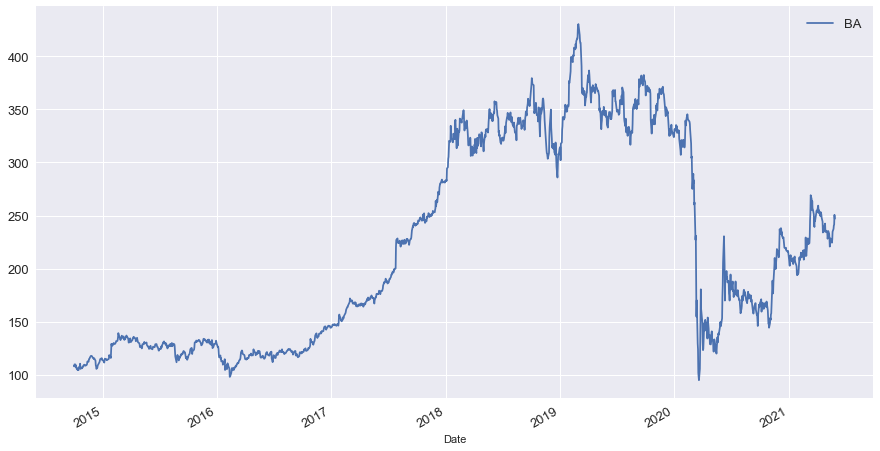

In [50]:
close.BA.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

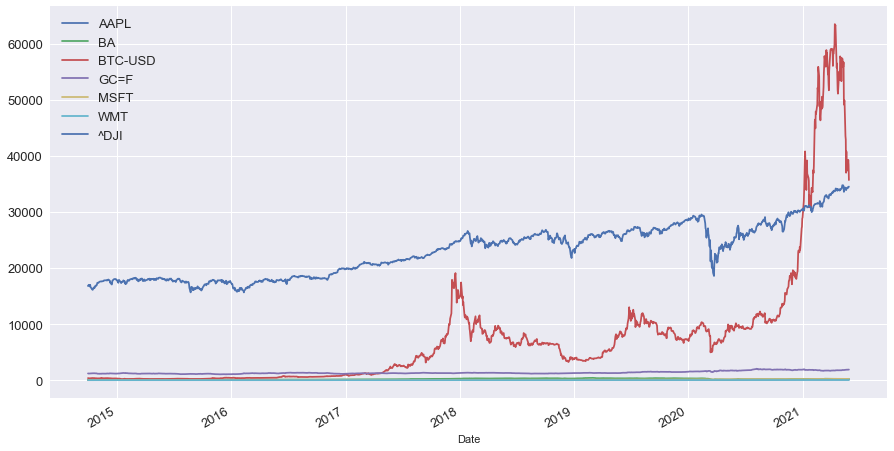

In [51]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Absolute Prices are absolutely meaningless/useless (in most cases)__ <br>
- Prices that are on a different scale are hard to compare 
- A higher Price does not imply a higher value or a better performance

In [52]:
close.to_csv("close.csv")

 ### <font color=blue> 3.  Normalizing Prices to a Base Value (100)
    
__-> all instruments start at the very same Level (Base Value)__

In [53]:
close.iloc[0,0]  # first price AAPL

21.96731185913086

In [54]:
close.AAPL.div(close.iloc[0,0]).mul(100)

Date
2014-10-01   100.0000
2014-10-02   100.7260
2014-10-03   100.4437
2014-10-04        NaN
2014-10-05        NaN
               ...   
2021-05-26   565.8435
2021-05-27   558.8401
2021-05-28   555.8515
2021-05-29        NaN
2021-05-30        NaN
Name: AAPL, Length: 2434, dtype: float64

In [55]:
close.iloc[0]

Ticker
AAPL         21.9673
BA          108.4067
BTC-USD     383.6150
GC=F       1214.6000
MSFT         39.0886
WMT          20.6006
^DJI      16804.7109
Name: 2014-10-01 00:00:00, dtype: float64

In [56]:
norm = close.div(close.iloc[0]).mul(100)
norm

Ticker,AAPL,BA,BTC-USD,GC=F,MSFT,WMT,^DJI
Date,,,,,,,
2014-10-01,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
2014-10-02,100.7260,99.5989,97.7730,99.9671,99.6950,100.1445,99.9782
2014-10-03,100.4437,101.3556,93.7169,98.1558,100.4139,101.5765,101.2198
2014-10-04,NaN,NaN,85.7281,NaN,NaN,NaN,NaN
2014-10-05,NaN,NaN,83.5499,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-26,565.8435,222.6523,10243.1344,156.5371,623.5286,218.1486,204.2466
2021-05-27,558.8401,231.2588,10019.6733,156.0761,618.1235,217.4121,205.0892
2021-05-28,555.8515,227.8642,9305.5815,156.6359,619.0409,217.9338,205.4748


In [57]:
norm.describe()

Ticker,AAPL,BA,BTC-USD,GC=F,MSFT,WMT,^DJI
count,1677.0000,1677.0000,2434.0000,1674.0000,1677.0000,1677.0000,1677.0000
mean,226.3847,202.2249,1984.7586,112.9602,254.9616,136.4389,136.8924
std,141.1228,88.1532,3026.7802,19.4068,153.7201,41.7034,27.7299
min,94.1150,87.6422,46.4275,86.5141,88.5725,75.9700,93.1892
25%,122.3118,118.9134,139.3658,100.1605,123.9596,100.1482,107.6270
50%,180.8139,170.7468,1138.7394,105.6438,212.6389,125.7146,140.5876
75%,246.6904,300.9317,2399.6911,122.0402,337.7856,171.6320,156.4441
max,636.5638,396.9313,16553.9561,168.9033,648.0157,231.7092,206.9525


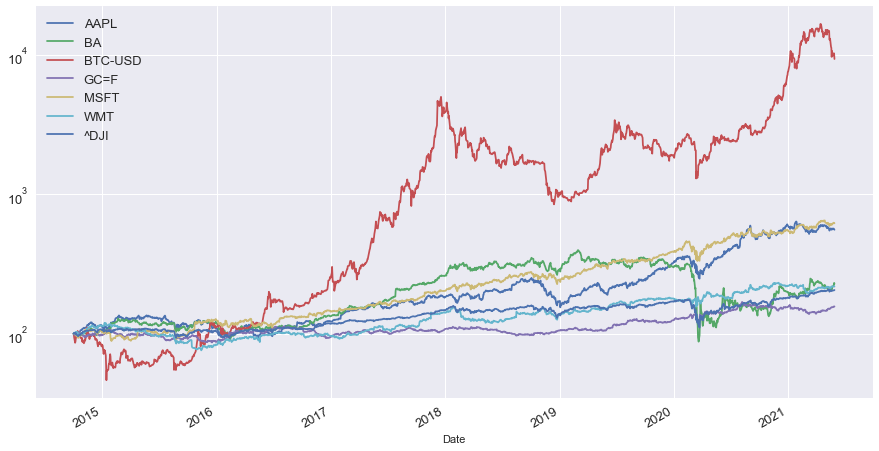

In [58]:
#norm.dropna().plot(figsize=(15,8), fontsize=13)
norm.dropna().plot(figsize=(15,8), fontsize=13, logy=True)
plt.legend(fontsize=13)
plt.show()

__Normalized Prices help to compare Financial Instruments...<br>
...but they are limited when it comes to measuring/comparing Performance in more detail (mean return and risk)__

 ### <font color=blue> 4. Volume Analysis

**Create a plot showing the daily volume of stock traded over the time period of 5 years.**

In [59]:
volume = df.Volume[['AAPL','BA','MSFT','WMT']].copy()
volume.describe()

Ticker,AAPL,BA,MSFT,WMT
count,1677.0000,1677.0000,1677.0000,1677.0000
mean,145411818.8432,8583579.2487,30466818.7239,25852688.1932
std,71213294.4518,11853840.6870,14394924.6167,14938335.5231
min,45448000.0000,788900.0000,7425600.0000,6682200.0000
25%,96034000.0000,3013900.0000,21603600.0000,17814000.0000
50%,127207600.0000,4175600.0000,27010000.0000,22164000.0000
75%,175540000.0000,7462000.0000,34655400.0000,29266200.0000
max,648825200.0000,103212800.0000,169164000.0000,242694300.0000


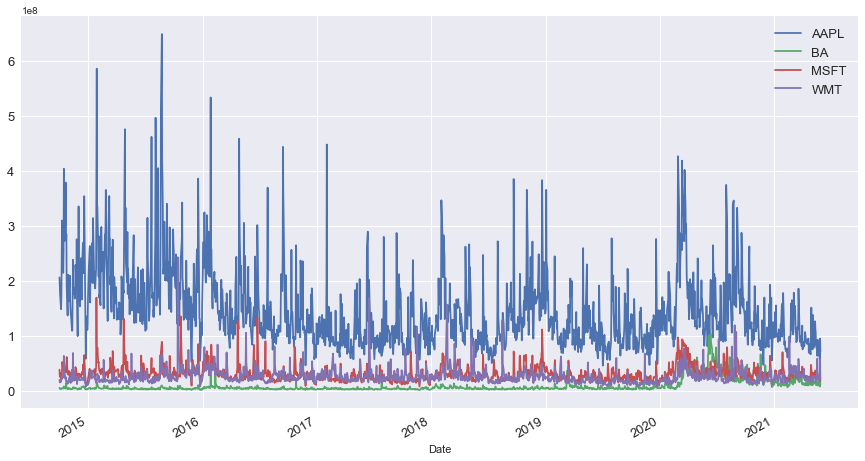

In [60]:
volume = df.Volume[['AAPL','BA','MSFT','WMT']].copy()
volume.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

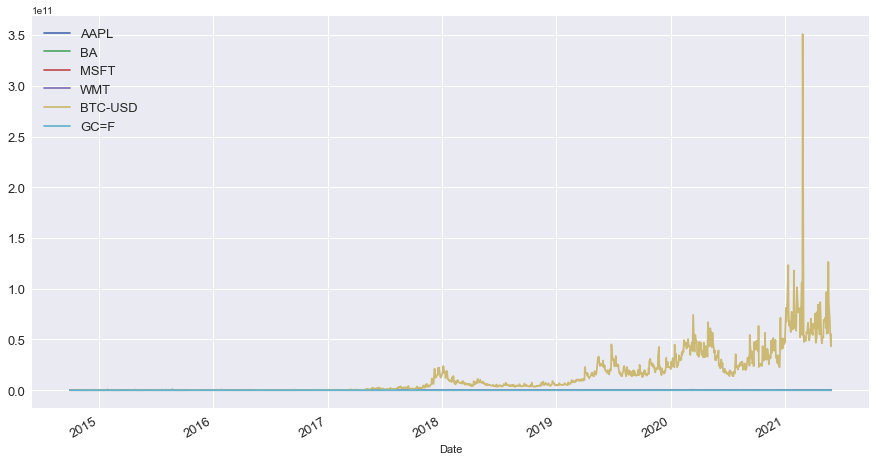

In [61]:
volume = df.Volume[['AAPL','BA','MSFT','WMT','BTC-USD','GC=F']].copy()
volume.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

**Plot total Traded.**

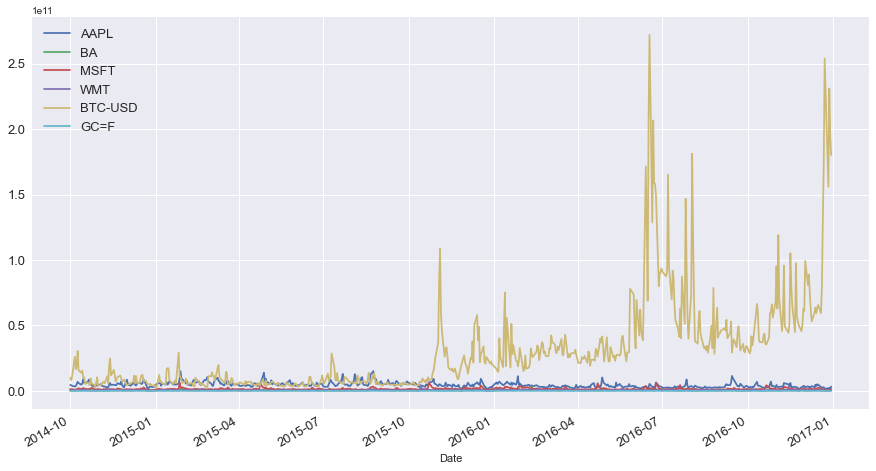

In [62]:
total_traded = close[:'2017-01-01'][['AAPL','BA','MSFT','WMT','BTC-USD','GC=F']] * volume[:'2017-01-01']
total_traded.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

**Interesting, looks like there was huge amount of money traded for Bitcoin somewhere since 2016**

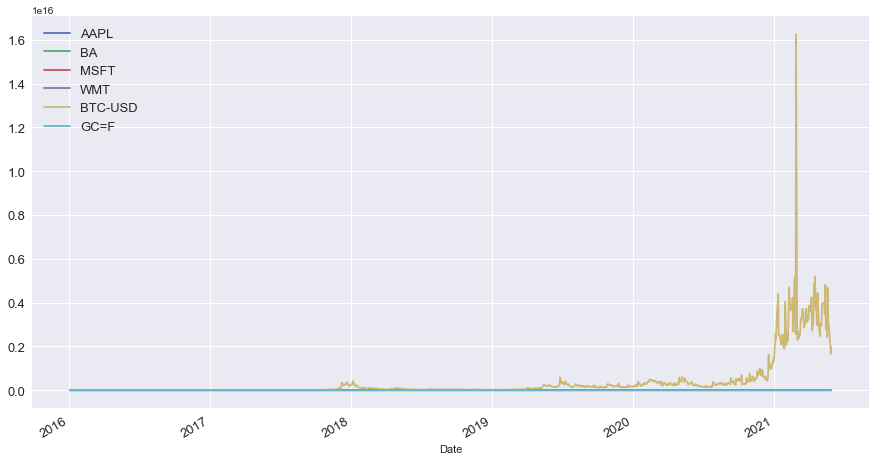

In [63]:
total_traded = close['2016-01-01':][['AAPL','BA','MSFT','WMT','BTC-USD','GC=F']] * volume['2016-01-01':]

total_traded.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [64]:
close['BTC-USD'].idxmax(), close['BTC-USD'].max()

(Timestamp('2021-04-13 00:00:00'), 63503.45703125)

 ### <font color=blue> 5. Correlation
    
Three cases:
- no correlation: __correlation coefficient == 0__
- moving together: __0 < correlation coefficient <= 1__ (positive)
- moving in opposite directions: __-1 <= correlation coefficient < 0__ (negative)

In [65]:
close.corr()

Ticker,AAPL,BA,BTC-USD,GC=F,MSFT,WMT,^DJI
Ticker,,,,,,,
AAPL,1.0000,0.2230,0.8103,0.9227,0.9662,0.9287,0.8519
BA,0.2230,1.0000,0.2514,0.1162,0.3643,0.4141,0.6736
BTC-USD,0.8103,0.2514,1.0000,0.6596,0.7818,0.7160,0.7715
GC=F,0.9227,0.1162,0.6596,1.0000,0.9221,0.9118,0.7463
MSFT,0.9662,0.3643,0.7818,0.9221,1.0000,0.9639,0.9066
WMT,0.9287,0.4141,0.7160,0.9118,0.9639,1.0000,0.9001
^DJI,0.8519,0.6736,0.7715,0.7463,0.9066,0.9001,1.0000


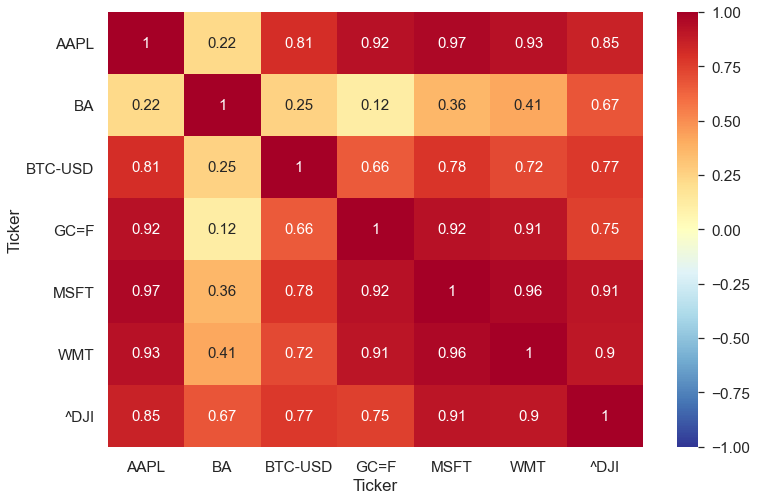

In [66]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(close.corr(), cmap = "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin = -1, vmax = 1)
plt.show()

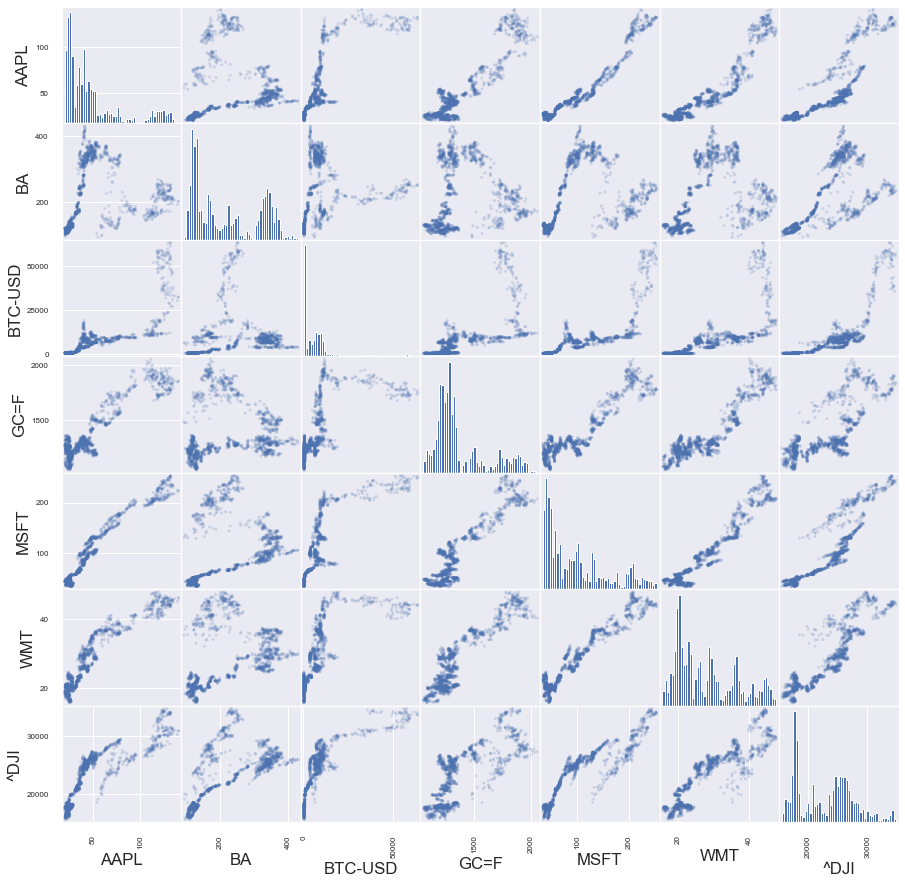

In [67]:
from pandas.plotting import scatter_matrix

# You can use a semi-colon to remove the axes print outs
scatter_matrix(close,figsize=(15,15),alpha=0.2,hist_kwds={'bins':50});

** It looks like MSFT, AAPL and WMT and have high positive relationship**

C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


<Axes: xlabel='AAPL', ylabel='MSFT'>

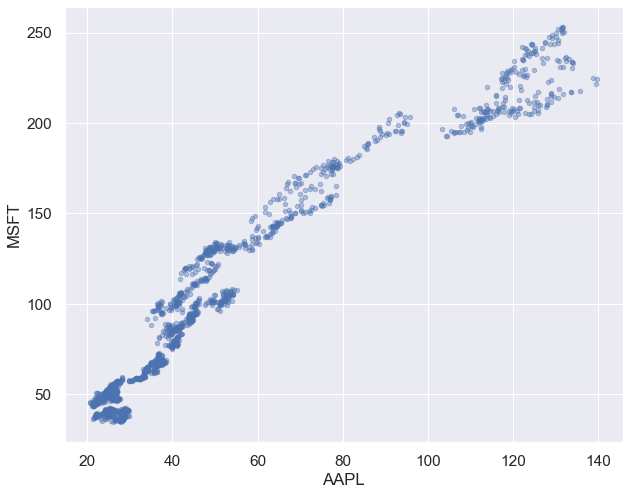

In [68]:
close.plot(kind='scatter',x='AAPL',y='MSFT',alpha=0.4,figsize=(10,8))

---
---
# <div class="alert alert-info"> 5. Financial Instruments / Fundamental Analysis </div>

 ## <font color=red> 5.1. Price Changes and Financial Returns

In [69]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])

 ### <font color=blue> 1. Daily absolute price changes

More meaningful/useful than Prices: very powerful method that allow us to calculate the absolute change, also the relative change in stock price from yesterday to today or from last week to today or whatever

__Price of one previous day__

In [70]:
msft = close.MSFT.dropna().to_frame().copy()
msft.rename(columns = {"MSFT": "Price"}, inplace=True)
msft["P_lag1"] = msft.shift(periods=1)
msft.head()

,Price,P_lag1
Date,,
2014-10-01,39.0886,NaN
2014-10-02,38.9694,39.0886
2014-10-03,39.2504,38.9694
2014-10-06,39.2504,39.2504
2014-10-07,38.7735,39.2504


__Absolute Price Changes__ (Difference)

In [71]:
msft["P_diff"] = msft.Price.diff(periods = 1)  # Alternative 1
msft["P_diff2"] = msft.Price.sub(msft.P_lag1)  # Alternative 2
msft.head()

,Price,P_lag1,P_diff,P_diff2
Date,,,,
2014-10-01,39.0886,NaN,NaN,NaN
2014-10-02,38.9694,39.0886,-0.1192,-0.1192
2014-10-03,39.2504,38.9694,0.2810,0.2810
2014-10-06,39.2504,39.2504,0.0000,0.0000
2014-10-07,38.7735,39.2504,-0.4769,-0.4769


In [72]:
msft.P_diff.equals(msft.P_diff2)

True

__-> Absolute Price Changes are not meaningful, it does not give the percentage between the money invested and the money received, especially in comparison with other assets__

In [73]:
msft.Price.iloc[-1] - msft.Price.iloc[0], msft.P_diff.sum()

(202.88583755493164, 202.88583755493164)

### <font color=blue> 2.  Daily Returns and Daily percentage Returns
       
**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss.  
    
**Daily percentage return**: It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). Daily percentage change is defined by the following formula:
    
$ r_t = \frac{p_t}{p_{t-1}} -1$
    
This defines $r_t$ (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

**EX**: There is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given
    
    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25
    
So for the above example the daily returns and daily percentage returns would be    
    
    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

#### Calculate daily percent return

In [74]:
msft["Returns"] = msft.Price.pct_change(periods=1)  # Alternative 1
# msft["Returns"] = msft.Price.div(msft.P_lag1) - 1 # Alternative 2
msft

,Price,P_lag1,P_diff,P_diff2,Returns
Date,,,,,
2014-10-01,39.0886,NaN,NaN,NaN,NaN
2014-10-02,38.9694,39.0886,-0.1192,-0.1192,-0.0031
2014-10-03,39.2504,38.9694,0.2810,0.2810,0.0072
2014-10-06,39.2504,39.2504,0.0000,0.0000,0.0000
2014-10-07,38.7735,39.2504,-0.4769,-0.4769,-0.0121
...,...,...,...,...,...
2021-05-24,243.0405,237.6036,5.4369,5.4369,0.0229
2021-05-25,243.9515,243.0405,0.9110,0.9110,0.0037
2021-05-26,243.7286,243.9515,-0.2229,-0.2229,-0.0009


In [75]:
46.0900 / 45.7600 - 1, (45.5300 / 46.0900 - 1) 

(0.007211538461538547, -0.012150141028422712)

__Relative Price Changes (Returns) are meaningful and comparable across instruments__

In [76]:
msft.drop(columns = ["P_lag1", "P_diff", "P_diff2"], inplace = True)
msft.to_csv("msft.csv")

### <font color=blue>3.  Investment Multiple

__Investment Multiple__: Ending Value of 1 [Dollar] invested. <br>
Multiple = Ending Value / Initial Investment

In [77]:
multiple = (msft.Price[-1] / msft.Price[0])
multiple

6.19040888984051

__Price Increase (in %)__

In [78]:
(multiple - 1) * 100

519.040888984051

In [79]:
msft.Price / msft.Price[0] # similar/identical concept: Normalized Price with Base Value 1

Date
2014-10-01   1.0000
2014-10-02   0.9969
2014-10-03   1.0041
2014-10-06   1.0041
2014-10-07   0.9919
              ...  
2021-05-24   6.2177
2021-05-25   6.2410
2021-05-26   6.2353
2021-05-27   6.1812
2021-05-28   6.1904
Name: Price, Length: 1677, dtype: float64

In [80]:
5.4397 - 1

4.4397

### <font color=blue> 4. Cumulative Daily Returns

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. 
    
With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. 

So for the above example cumulative gains are as follows
    
    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %
    
The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

In [81]:
import numpy as np
(1 + np.array([0.5,0.33,0.2])).cumprod()

array([1.5  , 1.995, 2.394])

**Create a cumulative daily return column for each car company's dataframe.**

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [82]:
msft['Cumulative Return'] = (1 + msft['Returns']).cumprod()

In [83]:
msft.head(20)

,Price,Returns,Cumulative Return
Date,,,
2014-10-01,39.0886,NaN,NaN
2014-10-02,38.9694,-0.0031,0.9969
2014-10-03,39.2504,0.0072,1.0041
2014-10-06,39.2504,0.0000,1.0041
2014-10-07,38.7735,-0.0121,0.9919
2014-10-08,39.8380,0.0275,1.0192
2014-10-09,39.0460,-0.0199,0.9989
2014-10-10,37.4961,-0.0397,0.9593
2014-10-13,37.1725,-0.0086,0.9510


In [84]:
msft.Price.iloc[1] - msft.Price.iloc[0], msft.Price.iloc[1]/msft.Price.iloc[0], msft.Price.iloc[1]/msft.Price.iloc[0] - 1

(-0.11923599243164062, 0.9969495970612607, -0.0030504029387392606)

In [85]:
msft["Cumulative Return"].iloc[-1]

6.1904088898404925

In [86]:
aapl = close['AAPL'].dropna().to_frame().copy()
aapl.rename(columns = {"AAPL":"Price"}, inplace = True)
aapl['Returns'] = aapl.Price.pct_change(periods = 1)
aapl['Cumulative Return'] = (1 + aapl['Returns']).cumprod()

ba = close.BA.dropna().to_frame().copy()
ba.rename(columns = {"BA":"Price"}, inplace = True)
ba['Returns'] = ba.Price.pct_change(periods = 1)
ba['Cumulative Return'] = (1 + ba['Returns']).cumprod()

wmt = close['WMT'].dropna().to_frame().copy()
wmt.rename(columns = {"WMT":"Price"}, inplace = True)
wmt['Returns'] = wmt.Price.pct_change(periods = 1)
wmt['Cumulative Return'] = (1 + wmt['Returns']).cumprod()

**plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

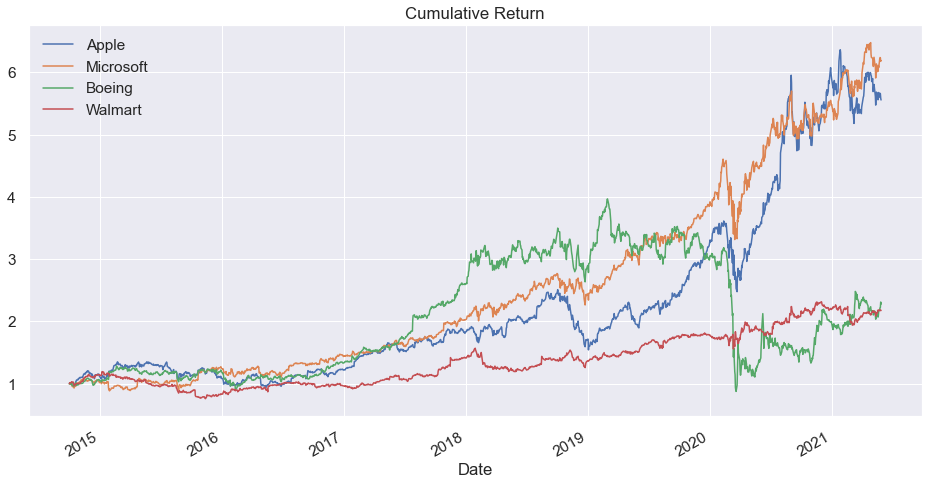

In [87]:
aapl['Cumulative Return'].plot(label='Apple',figsize=(16,8),title='Cumulative Return')
msft['Cumulative Return'].plot(label='Microsoft',figsize=(16,8),title='Cumulative Return')
ba['Cumulative Return'].plot(label='Boeing')
wmt['Cumulative Return'].plot(label='Walmart')
plt.legend()

In [88]:
msft.tail()

,Price,Returns,Cumulative Return
Date,,,
2021-05-24,243.0405,0.0229,6.2177
2021-05-25,243.9515,0.0037,6.2410
2021-05-26,243.7286,-0.0009,6.2353
2021-05-27,241.6158,-0.0087,6.1812
2021-05-28,241.9744,0.0015,6.1904


__Drawback of Investment Multiple: Doesn´t take into account investment Period. Meaningful only in conjunction with Investment Period.__

 ## <font color=red> 5.2. Simple Returns vs. Logarithmic Returns (log returns)

Very often log returns are used instead of simple returns.<br>
- favourable characteristics of log returns
- drawbacks of simple returns

 ### <font color=blue> 1.  Problem with simple returns

In [89]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])
df

,Price
2016,100
2017,50
2018,95


In [90]:
simple_returns = df.pct_change().dropna()
simple_returns

,Price
2017,-0.5000
2018,0.9000


In [91]:
simple_returns.mean()

Price   0.2000
dtype: float64

In [92]:
# with mean return = 20%, we expect to have at the end of the year 2008, we have a stock price of 144

100 * 1.2 * 1.2

144.0

In [93]:
df

,Price
2016,100
2017,50
2018,95


**What we can see here is actually a pitfall of similar returns and the mean or the average of simple returns. So having the average of simple returns, for example, 20 percent you cannot be 100 percent sure that we definitely are realized a positive return over the last two years so that we increase our investment. In fact, our investment dropped from 100 to 95. So having only the average of simple returns does not give us the information that we really really increase our investment. And with the mean or the average of simple returns, we are not able to calculate, starting from start of period to end of period. And consequently, the meaning of simple returns can be pretty misleading**

 ### <font color=blue>2. Log Returns

**We can overcome this problem by using logaric return**

In [94]:
np.log(df / df.shift(1))

,Price
2016,NaN
2017,-0.6931
2018,0.6419


In [95]:
log_returns = np.log(df / df.shift(1)).dropna()
#log_returns = df / df.shift(1).dropna()

In [96]:
log_returns

,Price
2017,-0.6931
2018,0.6419


In [97]:
log_returns.mean()

Price   -0.0256
dtype: float64

In [98]:
100 * np.exp(2 * log_returns.mean())

Price   95.0000
dtype: float64

 ### <font color=blue> 3. Simple Returns vs. Log Returns

In [99]:
df = pd.DataFrame(data = [100, 50, 90], columns = ["Price"])
df

,Price
0,100
1,50
2,90


In [100]:
df["SR"] = df.Price.pct_change() # simple returns

In [101]:
df["LR"] = np.log(df.Price / df.Price.shift()) # log returns

In [102]:
df

,Price,SR,LR
0,100,NaN,NaN
1,50,-0.5000,-0.6931
2,90,0.8000,0.5878


In [103]:
periods = df.SR.count()
periods

2

__The arithmetic mean of simple returns can be misleading!__

In [104]:
mean_sr = df.SR.mean()
mean_sr

0.15000000000000002

In [105]:
# Future value (FV) of an investment after n years

100 * (1 + mean_sr)**periods # wrong!!!

132.24999999999997

__We should use Compound Simple Returns / Geometric Mean, or even better...__

In [106]:
geo_mean = (1 + df.SR).prod()**(1 / periods) - 1
geo_mean

-0.05131670194948623

In [107]:
100 * (1 + geo_mean)**periods # correct!!!

89.99999999999999

__...Log Returns which are additive over time!__

In [108]:
sum_lr = df.LR.sum()
sum_lr

-0.10536051565782623

In [109]:
100 * np.exp(sum_lr) # correct!!!

90.0

In [110]:
mean_lr = df.LR.mean()
mean_lr

-0.05268025782891311

In [111]:
100 * np.exp(mean_lr * periods) # correct!!!

90.0

__Log Returns are additive over time. Simple Returns are not additive over time (but they can be multiplied/compounded)__

__Normalized Prices with Base 1__

In [112]:
df.SR.add(1).cumprod() # compounding simple returns ("compound returns")

0      NaN
1   0.5000
2   0.9000
Name: SR, dtype: float64

In [113]:
np.exp(df.LR.cumsum()) # adding log returns ("cumulative returns")

0      NaN
1   0.5000
2   0.9000
Name: LR, dtype: float64

In [114]:
df.LR.cumsum().apply(np.exp) # adding log returns ("cumulative returns"), percentage

0      NaN
1   0.5000
2   0.9000
Name: LR, dtype: float64

In [115]:
df.LR.cumsum().apply(np.exp).iloc[-1] * df.Price.iloc[0] # adding log returns ("cumulative returns"), absolute value

90.0

 ### <font color=blue> 4. Apply to stock

In [116]:
pd.options.display.float_format = '{:.6f}'.format

In [117]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) # daily log returns
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,39.088604,NaN,NaN
2014-10-02,38.969368,-0.003050,-0.003055
2014-10-03,39.250397,0.007212,0.007186
2014-10-06,39.250397,0.000000,0.000000
2014-10-07,38.773510,-0.012150,-0.012224
...,...,...,...
2021-05-24,243.040512,0.022882,0.022624
2021-05-25,243.951508,0.003748,0.003741
2021-05-26,243.728638,-0.000914,-0.000914


In [118]:
msft.describe()

,Price,Returns,log_ret
count,1677.000000,1676.000000,1676.000000
mean,99.660940,0.001237,0.001088
std,60.087049,0.017240,0.017233
min,34.621773,-0.147390,-0.159453
25%,48.454067,-0.006110,-0.006129
50%,83.117577,0.000962,0.000961
75%,132.035675,0.009110,0.009069
max,253.300278,0.142169,0.132929


In [119]:
mu = msft.log_ret.mean() # mean log return -> Reward
mu

0.0010877095113555556

In [120]:
sigma = msft.log_ret.std() # standard deviation of log returns -> Risk/Volatility
sigma

0.017232772924314514

__Investment Multiple__

In [121]:
msft.head()

,Price,Returns,log_ret
Date,,,
2014-10-01,39.088604,NaN,NaN
2014-10-02,38.969368,-0.003050,-0.003055
2014-10-03,39.250397,0.007212,0.007186
2014-10-06,39.250397,0.000000,0.000000
2014-10-07,38.773510,-0.012150,-0.012224


In [122]:
msft.tail()

,Price,Returns,log_ret
Date,,,
2021-05-24,243.040512,0.022882,0.022624
2021-05-25,243.951508,0.003748,0.003741
2021-05-26,243.728638,-0.000914,-0.000914
2021-05-27,241.615845,-0.008669,-0.008706
2021-05-28,241.974442,0.001484,0.001483


In [123]:
msft.Price[-1]/msft.Price[0]

6.19040888984051

In [124]:
msft.Returns.add(1).prod() # compounding simple returns ("compound returns")

6.190408889840692

In [125]:
np.exp(msft.log_ret.sum()), msft.Price[0] * np.exp(msft.log_ret.sum())  # adding log returns ("cumulative returns")

(6.19040888984049, 241.97444152831952)

__Normalized Prices with Base 1__

In [126]:
msft.Returns.add(1).cumprod() # compounding simple returns ("compound returns")

Date
2014-10-01        NaN
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   6.217682
2021-05-25   6.240988
2021-05-26   6.235286
2021-05-27   6.181235
2021-05-28   6.190409
Name: Returns, Length: 1677, dtype: float64

In [127]:
np.exp(msft.log_ret.cumsum()) # adding log returns ("cumulative returns")

Date
2014-10-01        NaN
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   6.217682
2021-05-25   6.240988
2021-05-26   6.235286
2021-05-27   6.181235
2021-05-28   6.190409
Name: log_ret, Length: 1677, dtype: float64

In [128]:
msft.log_ret.cumsum().apply(np.exp) # adding log returns ("cumulative returns")

Date
2014-10-01        NaN
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   6.217682
2021-05-25   6.240988
2021-05-26   6.235286
2021-05-27   6.181235
2021-05-28   6.190409
Name: log_ret, Length: 1677, dtype: float64

 ## <font color=red> 5.3.  Measuring Performance (Mean of Returns and Risk)

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__
    
- Reward: Positive Returns
- Risk: Volatility of Returns

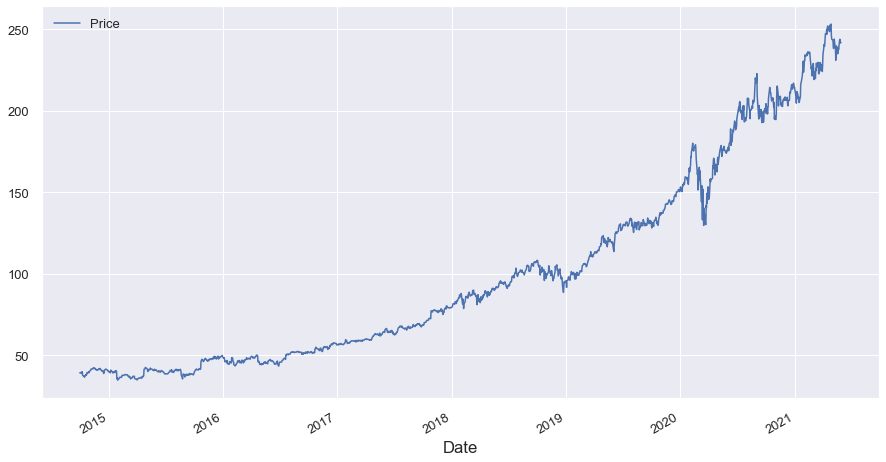

In [129]:
msft.Price.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

### 

### <font color=blue> 1. Distribution of daily percentage returns

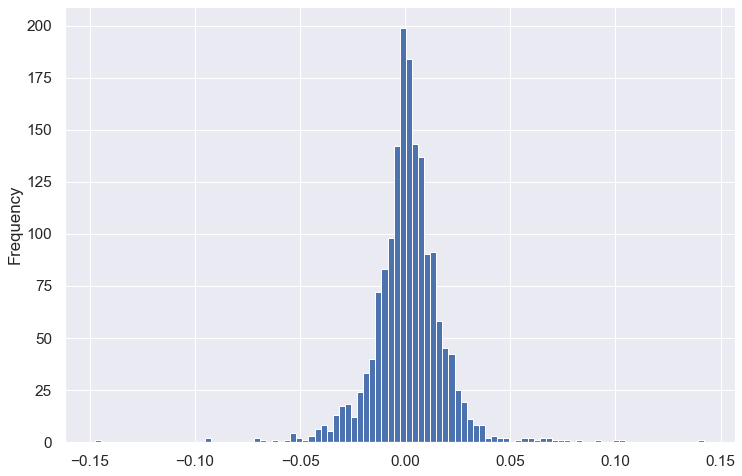

In [130]:
msft.Returns.plot(kind='hist', figsize=(12,8), bins=100)
plt.show()

This is the distribution of daily returns and the majority of the returns are here around zero percent. But we have some extreme values here in the tail. 

**two major metrics to summarize these distributions and this is the mean/the average return and the variance or the standard deviation of returns**

In [131]:
msft.describe()

,Price,Returns,log_ret
count,1677.000000,1676.000000,1676.000000
mean,99.660940,0.001237,0.001088
std,60.087049,0.017240,0.017233
min,34.621773,-0.147390,-0.159453
25%,48.454067,-0.006110,-0.006129
50%,83.117577,0.000962,0.000961
75%,132.035675,0.009110,0.009069
max,253.300278,0.142169,0.132929


In [132]:
mu = msft.Returns.mean() # arithmetic mean return -> Reward
mu

0.0012367319064566125

In [133]:
sigma = msft.Returns.std() # standard deviation of returns -> Risk/Volatility
sigma

0.017240425575026027

In [134]:
np.sqrt(msft.Returns.var())

0.017240425575026027

 ### <font color=blue> 2. Normality of Financial Returns 

In [135]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) 
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,39.088604,NaN,NaN
2014-10-02,38.969368,-0.003050,-0.003055
2014-10-03,39.250397,0.007212,0.007186
2014-10-06,39.250397,0.000000,0.000000
2014-10-07,38.773510,-0.012150,-0.012224
...,...,...,...
2021-05-24,243.040512,0.022882,0.022624
2021-05-25,243.951508,0.003748,0.003741
2021-05-26,243.728638,-0.000914,-0.000914


In [136]:
msft.describe()

,Price,Returns,log_ret
count,1677.000000,1676.000000,1676.000000
mean,99.660940,0.001237,0.001088
std,60.087049,0.017240,0.017233
min,34.621773,-0.147390,-0.159453
25%,48.454067,-0.006110,-0.006129
50%,83.117577,0.000962,0.000961
75%,132.035675,0.009110,0.009069
max,253.300278,0.142169,0.132929


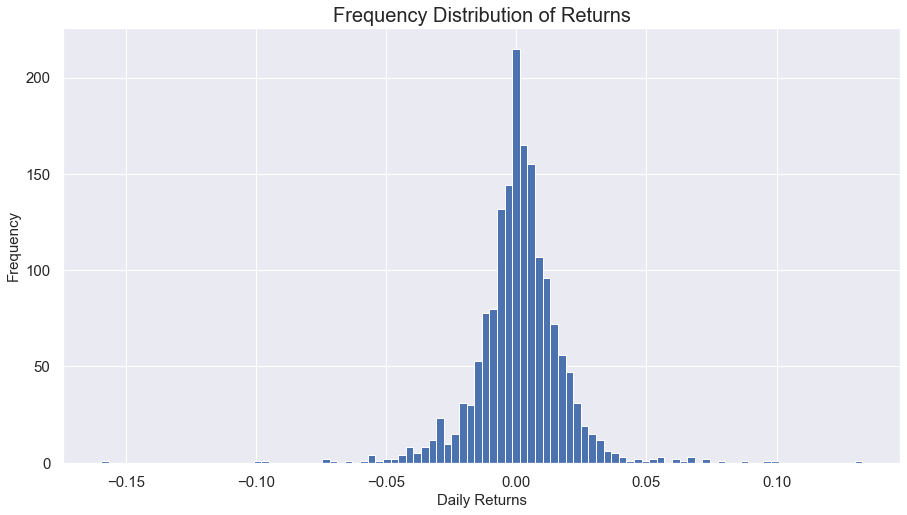

In [137]:
msft.log_ret.plot(kind = "hist", figsize = (15 ,8), bins = 100, fontsize = 15, density = False) # Frequency Distribution of log returns
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

__Do MSFT Returns follow a Normal Distribution?__ <br><br>
A normally distributed random variable can be fully described by its 
- mean
- standard deviation

Higher Central Moments are zero:
- Skew = 0 (measures symmetrie around the mean)
- (Excess) Kurtosis = 0 (positve excess Kurtosis -> more observations in the "tails")

In [138]:
mu = msft.log_ret.mean()
mu

0.0010877095113555556

In [139]:
sigma = msft.log_ret.std()
sigma

0.017232772924314514

In [140]:
import scipy.stats as stats

In [141]:
stats.skew(msft.log_ret.dropna()) # in a Normal Distribution: skew == 0

-0.2073104768697027

In [142]:
stats.kurtosis(msft.log_ret.dropna(), fisher = True) # in a Normal Distribution: (fisher) kurtosis == 0

10.781819984202693

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__

In [143]:
x = np.linspace(msft.log_ret.min(), msft.log_ret.max(), 10000)
x

array([-0.15945325, -0.159424  , -0.15939476, ...,  0.13287021,
        0.13289945,  0.13292869])

In [144]:
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
y

array([3.30147134e-18, 3.35406995e-18, 3.40749675e-18, ...,
       4.63285354e-12, 4.57311933e-12, 4.51414230e-12])

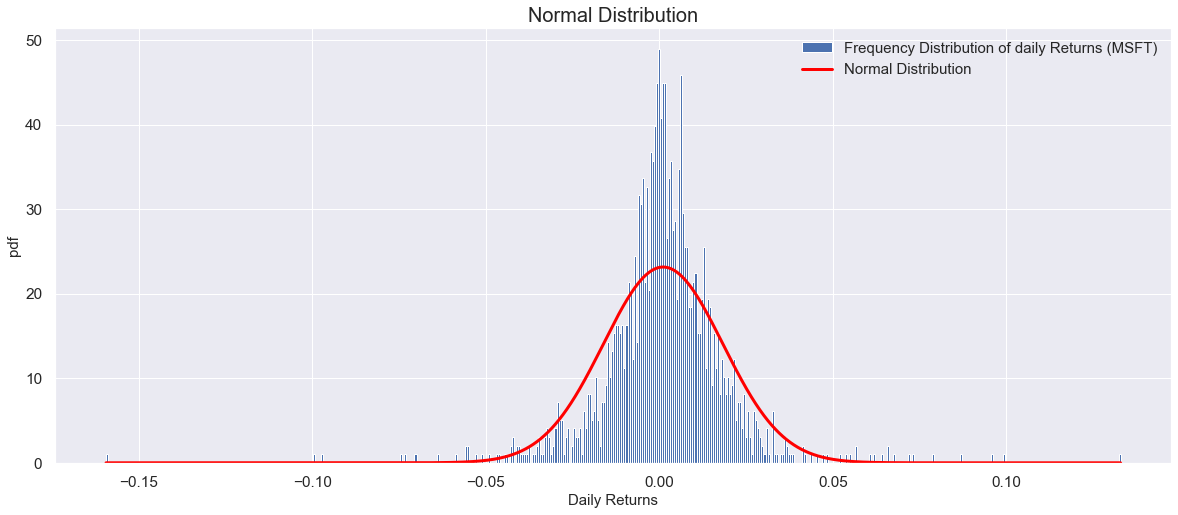

In [145]:
plt.figure(figsize = (20, 8))
plt.hist(msft.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__ 

__Testing the normality of MSFT Returns based on the sample (Oct 2014 to May 2021):__ <br>
__-> Hypothesis Test with H0 Hypothesis: MSFT Returns (full population) follow a normal Distribution.__ 

In [146]:
z_stat, p_value = stats.normaltest(msft.log_ret.dropna())

In [147]:
z_stat # high values -> reject H0

328.3587961754899

In [148]:
p_value # low values (close to zero) -> reject H0

4.986471811228458e-72

In [149]:
round(p_value, 10)

0.0

__-> Assuming that MSFT Returns (generally) follow a Normal Distribution, there is 0% probability that we get that extreme outcomes in a sample.__ 

__MSFT Returns don´t follow a Normal Distribution as they exhibit "Fat Tails". Extreme Events/Outcomes are not reflected in the Mean-Variance Analysis. The Standard Deviation of Returns underestimates true Risk.__

 ## <font color=red> 5.4. Invesment Multiple and CAGR
    
__Two alternative reward metrics that are more intuitive and easier to interpret.__

### <font color=blue>1.  Investment Multiple

__Investment Multiple__: Ending Value of 1 [Dollar] invested. <br>
Multiple = Ending Value / Initial Investment

In [150]:
multiple = (msft.Price[-1] / msft.Price[0])
multiple

6.19040888984051

__Price Increase (in %)__

In [151]:
(multiple - 1) * 100

519.040888984051

In [152]:
msft.Price / msft.Price[0] # similar/identical concept: Normalized Price with Base Value 1

Date
2014-10-01   1.000000
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   6.217682
2021-05-25   6.240988
2021-05-26   6.235286
2021-05-27   6.181235
2021-05-28   6.190409
Name: Price, Length: 1677, dtype: float64

In [153]:
5.4397 - 1

4.4397

In [154]:
msft.tail()

,Price,Returns,log_ret
Date,,,
2021-05-24,243.040512,0.022882,0.022624
2021-05-25,243.951508,0.003748,0.003741
2021-05-26,243.728638,-0.000914,-0.000914
2021-05-27,241.615845,-0.008669,-0.008706
2021-05-28,241.974442,0.001484,0.001483


__Drawback of Investment Multiple: Doesn´t take into account investment Period. Meaningful only in conjunction with Investment Period.__

### <font color=blue> 2. Compound Annual Growth Rate (CAGR)
__Compound Annual Growth Rate (CAGR)__: The (constant annual) rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the **profits were reinvested at the end of each year of the investment's lifespan**. (Wikipedia)

__CAGR__

In [155]:
(msft.Price[-1]/msft.Price[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1

0.31508343164292985

In [156]:
trading_days_year = msft.Returns.count() / ((msft.index[-1] - msft.index[0]).days / 365.25)
trading_days_year

251.81365693130397

In [157]:
np.exp(msft.log_ret.mean() * trading_days_year) - 1 # correct with mean of daily log returns!

0.3150834316429292

In [158]:
msft.Returns.mean() * trading_days_year # incorrect with mean of daily simple returns!

0.31142598400846294

In [159]:
np.exp(msft.log_ret.mean() * 252) - 1 # good approximation (for us stocks)

0.31535000914202804

In [160]:
start = msft.index[0]
end = msft.index[-1]
td = end - start
td_years = td.days / 365.25

print(start, end, td, td_years)

2014-10-01 00:00:00 2021-05-28 00:00:00 2431 days 00:00:00 6.655715263518139


In [161]:
cagr = multiple**(1 / td_years) - 1 # short version
print(cagr)

cagr = (msft.Price[-1]/msft.Price[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1 # long
print(cagr)

0.31508343164292985
0.31508343164292985


In [162]:
(1 + cagr)**(td_years) # alternative #2 to calculate multiple (cagr)

6.190408889840509

__-> CAGR can be used to compare Investments with different investment horizons.__

 ### <font color=blue> 3. Compound Returns & Geometric Mean Return

In [163]:
multiple = (1 + msft.Returns).prod() # alternative #3 to calculate multiple (compounding daily returns)
multiple

6.190408889840692

In [164]:
n = msft.Returns.count()
n

1676

In [165]:
geo_mean = multiple**(1/n) - 1 # Geometric mean return (daily)
geo_mean

0.0010883012818847515

In [166]:
(1 + geo_mean)**n # alternative #4 to calculate multiple (geometric mean)

6.190408889840017

__-> Compound returns, CAGR & geometric mean return are closely related concepts__.

In [167]:
mu = msft.Returns.mean() # arithmetic mean return
mu

0.0012367319064566125

__The arithmetic mean return is always greater than the geometric mean return... and less useful__. 

In [168]:
(1 + mu)**n # calculate multiple? not possible with arithmetic mean!

7.936576453560448

 ### <font color=blue> 4.  Annualizing Mean Return and Std of Returns

In [169]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"], usecols = ["Date", "Price"])
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())
msft

,Price,log_ret
Date,,
2014-10-01,39.088604,NaN
2014-10-02,38.969368,-0.003055
2014-10-03,39.250397,0.007186
2014-10-06,39.250397,0.000000
2014-10-07,38.773510,-0.012224
...,...,...
2021-05-24,243.040512,0.022624
2021-05-25,243.951508,0.003741
2021-05-26,243.728638,-0.000914


In [170]:
msft.log_ret.agg(["mean", "std"]) # mean and std based on daily returns

mean   0.001088
std    0.017233
Name: log_ret, dtype: float64

In [171]:
ann_mu = msft.log_ret.mean() * 252 
ann_mu

0.2741027968616

In [172]:
cagr = np.exp(ann_mu) - 1 # don´t mix up with cagr
cagr

0.31535000914202804

In [173]:
ann_std = msft.log_ret.std() * np.sqrt(252) 
ann_std

0.27356178934670106

In [174]:
ann_std = np.sqrt(msft.log_ret.var() * 252) # annualized std of returns (Alt 2)
ann_std

0.27356178934670106

 ## <font color=red> 5.5.  Resampling / Smoothing

In [175]:
monthly = msft.Price.resample("M").last() ## resample to monthly (month end)
monthly

Date
2014-10-31    39.982777
2014-11-30    40.971958
2014-12-31    39.806477
2015-01-31    34.621773
2015-02-28    37.845768
                ...    
2021-01-31   223.768066
2021-02-28   224.689514
2021-03-31   227.967346
2021-04-30   243.834259
2021-05-31   241.974442
Freq: M, Name: Price, Length: 80, dtype: float64

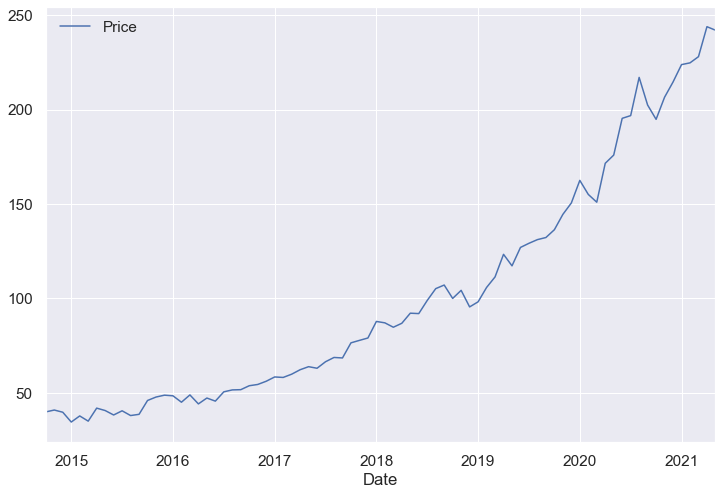

In [176]:
monthly.plot(figsize = (12, 8))
plt.legend()
plt.show()

__How will the Mean-Variance Analysis change with smoothed data?__

In [177]:
freqs = ["A", "Q", "M", "W-Fri", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [178]:
for i in range(5):
    resamp = msft.Price.resample(freqs[i]).last() # resample
    ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i]) # calc. annualized mean
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i])) # calc. annualized std

In [179]:
ann_mean

[0.25782892564864557,
 0.2776619199293105,
 0.27347594880420145,
 0.27256849817804296,
 0.27498680476958126]

In [180]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

,ann_std,ann_mean
A,0.126092,0.257829
Q,0.178562,0.277662
M,0.204304,0.273476
W-Fri,0.230190,0.272568
D,0.266987,0.274987


C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


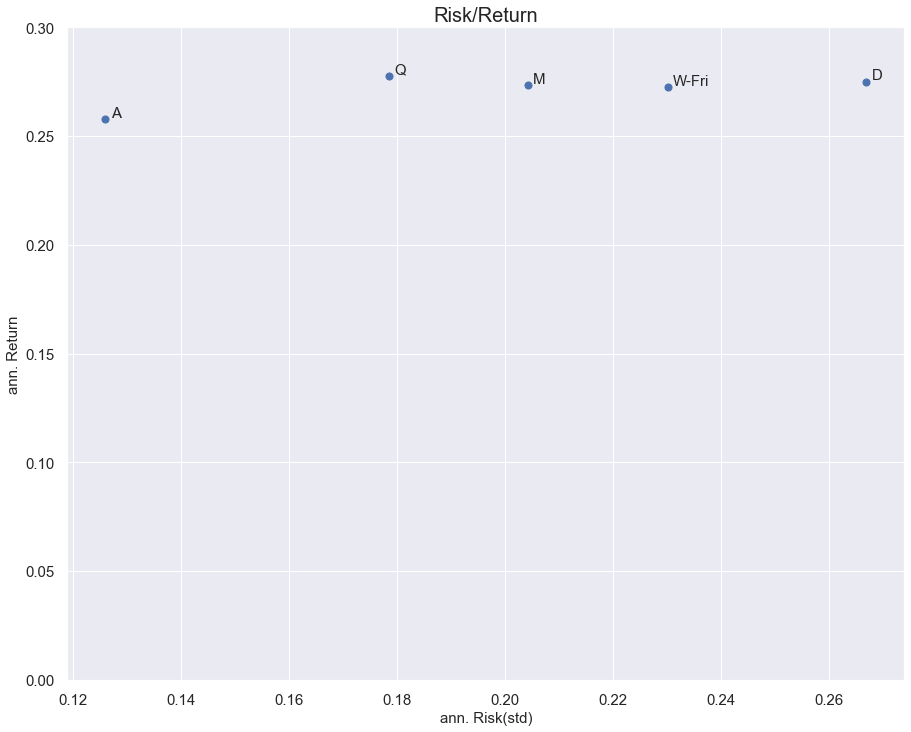

In [181]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.ylim(0, 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__-> Smoothing reduces (observed) Risk__. 

Dubious practices:
- Managing (Manipulating) Performance in Performance Reportings.
- Comparing assets with different granularity and pricing mechanisms -> e.g. non-listed (alternative assets) vs. listed assets 
- Adjusting granularity to investor´s (average) holding period -> Volatility is still there.

 ## <font color=red> 5.6.  Rolling Statistics

__(Another) general Rule in Finance/Investing: Past performance is not an indicator of future performance__.

In [182]:
ann_mu = msft.log_ret.mean() * 252 # annualized mean return
ann_mu

0.2741027968616

In [183]:
ann_std = msft.log_ret.std() * np.sqrt(252) # annualized std of returns (Alt 1)
ann_std

0.27356178934670106

__Are Return and Risk constant over time? No, of course not! They change over time.__

__Let´s measure/quantify this with rolling statistics!__

In [184]:
window = 252 # rolling window 252 trading days (~ 1 Year)

In [185]:
msft.log_ret.rolling(window = 252)

Rolling [window=252,center=False,axis=0,method=single]

In [186]:
msft.log_ret.rolling(window = 252).sum() # Alt 1

Date
2014-10-01        NaN
2014-10-02        NaN
2014-10-03        NaN
2014-10-06        NaN
2014-10-07        NaN
               ...   
2021-05-24   0.321943
2021-05-25   0.336312
2021-05-26   0.334077
2021-05-27   0.327629
2021-05-28   0.318965
Name: log_ret, Length: 1677, dtype: float64

In [187]:
roll_mean = msft.log_ret.rolling(window = 252).mean() * 252 # Alt 2
roll_mean

Date
2014-10-01        NaN
2014-10-02        NaN
2014-10-03        NaN
2014-10-06        NaN
2014-10-07        NaN
               ...   
2021-05-24   0.321943
2021-05-25   0.336312
2021-05-26   0.334077
2021-05-27   0.327629
2021-05-28   0.318965
Name: log_ret, Length: 1677, dtype: float64

In [188]:
roll_mean.iloc[250:]

Date
2015-09-29         NaN
2015-09-30         NaN
2015-10-01   -0.002078
2015-10-02    0.022269
2015-10-05    0.038078
                ...   
2021-05-24    0.321943
2021-05-25    0.336312
2021-05-26    0.334077
2021-05-27    0.327629
2021-05-28    0.318965
Name: log_ret, Length: 1427, dtype: float64

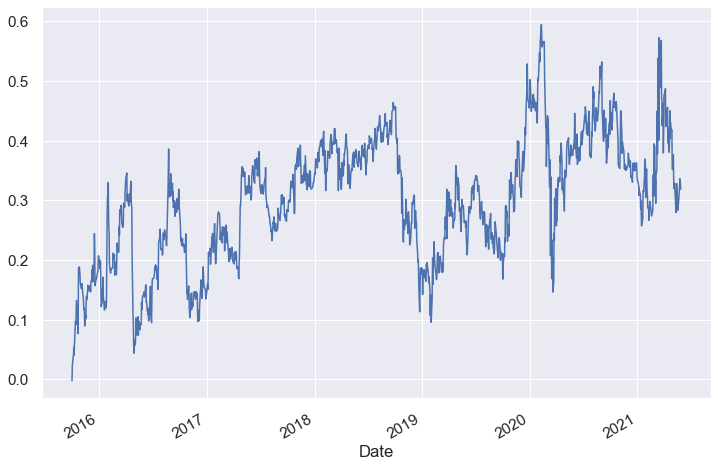

In [189]:
roll_mean.plot(figsize = (12, 8))
plt.show()

In [190]:
roll_std = msft.log_ret.rolling(window = 252).std() * np.sqrt(252)
roll_std

Date
2014-10-01        NaN
2014-10-02        NaN
2014-10-03        NaN
2014-10-06        NaN
2014-10-07        NaN
               ...   
2021-05-24   0.279222
2021-05-25   0.278977
2021-05-26   0.278986
2021-05-27   0.279143
2021-05-28   0.279002
Name: log_ret, Length: 1677, dtype: float64

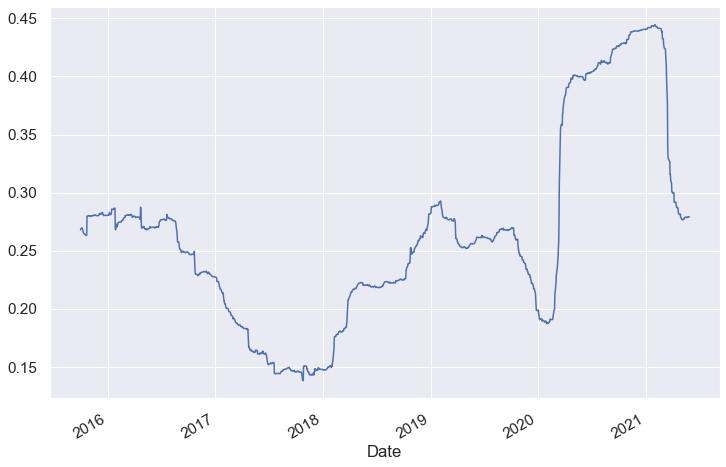

In [191]:
roll_std.plot(figsize = (12, 8))
plt.show()

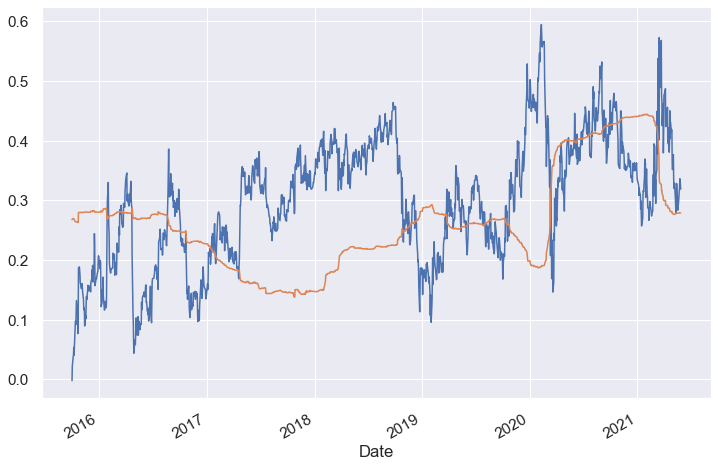

In [192]:
roll_mean.plot(figsize = (12, 8))
roll_std.plot()
plt.show()

__Be careful, you´ll always find (sub-)periods with __low returns & high risk__ and __high returns & low risk__. 

- Analysis Period must be __sufficiently long__ to reduce impact of random noise. <br>
- Analysis Period should be __as short as possible__ and should only include the __latest trends / regimes__.
- Commonly used reporting period: __3 Years / 36 Months__

__Another Example: Simple Moving Average (Prices) - SMA__

In [193]:
sma_window = 50

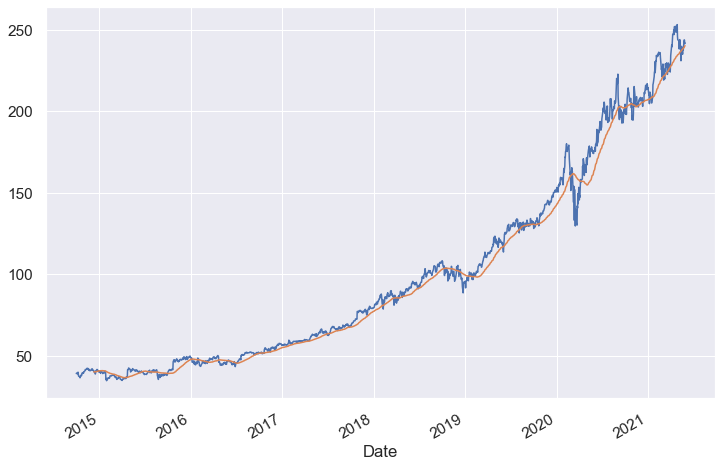

In [194]:
msft.Price.plot(figsize = (12, 8))
msft.Price.rolling(sma_window).mean().plot()
plt.show()

---
---
# <div class="alert alert-info"> 6. FUNDAMENTAL FINANCE </div>

 ## <font color=red> 6.1. Time value of Money
    
 ### <font color=blue>1. Overview   
    
The most important concept in finance is that the time value of money x today is worth more than x in a year's time. 
Reasons:
+ Interest rate: because we may invest $x today into stocks, or lent it to bank for some  interest
+ Inflation: Future money worth less because inflation will push prices higher so the buying power of money will be lower

1.  **Future value (FV) - discrete model**: is the value of a current asset at a specified date in the future based on an assumed rate of growth over time
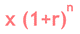
+ r: interest rate of a year
+ n: number of years

2. **Present value (PV) - discrete model**: defines how much a future sum of money is worth today given a specified rate of interest
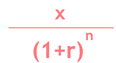

3. **Future value - continuous model**: Suppose we have amount x(t) in the bank in time t. How much does this increase in  value from one day to the next? => This is the change in the amount of money, the derivative of xdt with respect of T times
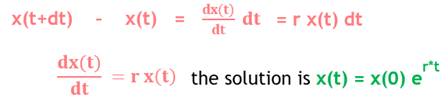

 ### <font color=blue>2. Discrete Compounding

__Annual Compounding__ -> Interests accrue once a year at the end of the year

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __annual compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account once at the end of each year.__

In [195]:
PV = 100
r = 0.08
n = 1

In [196]:
100 * 1.08

108.0

In [197]:
FV = PV * (1 + r)**n
FV

108.0

In [198]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

0.08000000000000007

__Quarterly Compounding__ -> Interests accrue once a quarter at the end of the quarter

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __quarterly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each quarter.__

In [199]:
PV = 100
r = 0.08
n = 1
m = 4

In [200]:
100 * 1.02 * 1.02 * 1.02 * 1.02

108.243216

In [201]:
FV = PV * (1 + r/m)**(n*m)
FV

108.243216

In [202]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

0.08243215999999998

__-> Quarterly compounding is favourable (everything else equal) as we earn compound interest (interest on interest).__

__Monthly Compounding__ -> Interests accrue once a month at the end of the month

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __monthly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each month.__

In [203]:
PV = 100
r = 0.08
n = 1
m = 12

In [204]:
FV = PV * (1 + r/m)**(n*m)
FV

108.29995068075098

In [205]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) 
effective_annual_rate

0.08299950680750978

 ### <font color=blue>3. Continuous Compounding 

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __continuous compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account continuously (infinitely large number of compounding events).__ -> continuous exponential growth that can be observed in nature

In [206]:
PV = 100
r = 0.08
n = 1
m = 100000 # approx.infinity

In [207]:
FV = PV * (1 + r/m)**(n*m) # approx. with large m
FV

108.32870330122834

In [208]:
FV = PV * np.exp(n * r) # exact math with e (euler number)
FV

108.32870676749586

In [209]:
euler = np.exp(1)
euler

2.718281828459045

In [210]:
PV * euler**(n * r)

108.32870676749586

In [211]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) # Alt 1
effective_annual_rate

0.08328706767495864

In [212]:
effective_annual_rate = np.exp(r) - 1 # Alt 2
effective_annual_rate

0.08328706767495864

Let´s assume we only observe PV and FV, how to calculate the stated rate/continuously compounded rate of 8%?

In [213]:
r = np.log(FV / PV) # inverse calculation -> use log (Alt 1)
r

0.08000000000000007

In [214]:
r = np.log(effective_annual_rate + 1) # inverse calculation -> use log (Alt 2)
r

0.08000000000000007

__Prices of traded Financial Instruments change (approx.) continuously. <br>
-> Intuitively, it makes a lot of sense to work with log returns.__ 

 ### <font color=blue>4. Define Function

In [215]:
def future_discrete_value(x, r, n):
    return x*(1+r)**n


def present_discrete_value(x, r, n):
    return x*(1+r)**-n


def future_continuous_value(x, r, t):
    return x*exp(r*t)


def present_continuous_value(x, r, t):
    return x*exp(-r*t)


# value of investment in dollars
x = 100
# define the interest rate
r = 0.05
# duration (years)
n = 5

print('Future value (discrete model) of x: %s' % future_discrete_value(x, r, n))
print('Present value (discrete model) of x: %s' % present_discrete_value(x, r, n))
print('Future value (continuous model) of x: %s' % future_continuous_value(x, r, n))
print('Present value (continous model) of x: %s' % present_continuous_value(x, r, n))

Future value (discrete model) of x: 127.62815625000003
Present value (discrete model) of x: 78.35261664684589
Future value (continuous model) of x: 128.40254166877415
Present value (continous model) of x: 77.8800783071405


---
---
# <div class="alert alert-info"> 7. FINANCIAL INSTRUMENT </div>

## <font color=red>6.2. Coupon</font>
1. A bond is a debt investment in which an investor loans money to an entity (company or government)
2. Two main properties:
    + Defined period of time
    + Variable of fixed interest rate
3. There are two main types of bonds: zero-coupon and coupon bonds

### <font color=blue>1. Zero-Coupon Bonds</font>
1. Zero-coupon bonds has three important parameters:
    + **Principal amount**: The principal amount is paid to the investor after a specified period of time. It is crucial that when dealing with zero-coupon bonds no other cash payment is made
    + **the premium (interest rate of the bond)**: The premium (interest rate) the bond issuer is willing to pay to the investor for the loan
    + **Maturity date**: It defines the end of the agreement. At this time the bond issuer redeems the bond by paying the principal
<br> <br>
2. EX:
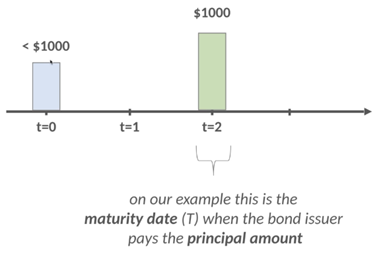

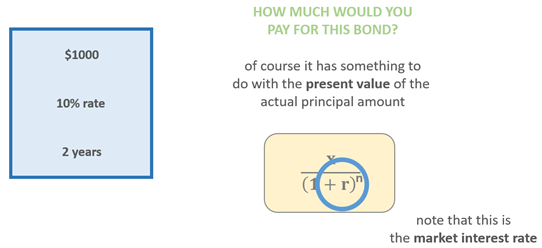

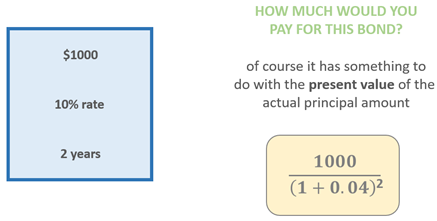

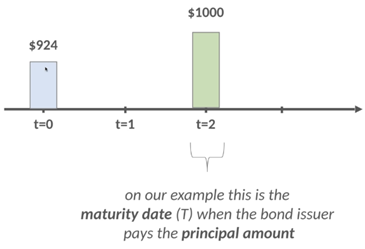

In [216]:
class ZeroCouponBond:
    
    def __init__(self, principal, maturity, interest_rate):
        # principal amount
        self.principal = principal
        # date to maturity
        self.maturity = maturity
        # market interest rate
        self.interest_rate = interest_rate / 100
        
    def present_value(self, x, n):
        return x / (1 + self.interest_rate)**n
    
    def calculate_price(self):
        return self.present_value(self.principal, self.maturity)
    

bond = ZeroCouponBond(1000, 2, 4)
print("Price of the bond in dollars: %.2f" % bond.calculate_price())

Price of the bond in dollars: 924.56


### <font color=blue>2. Coupon Bonds</font>

1. Parameters:
    + **Principal amount**: The principal amount is paid to the investor after a specified period of time. 
    + **Coupon rate**: a coupon rate is stated as a nomial percentage of the princiapl amount of the given coupon bond. The rate of interest the bonds pay annually
    + **Maturity date**: It defines the end of the agreement. At this time the bond issuer redeems the bond by paying the principal
<br> <br>
2. EX:
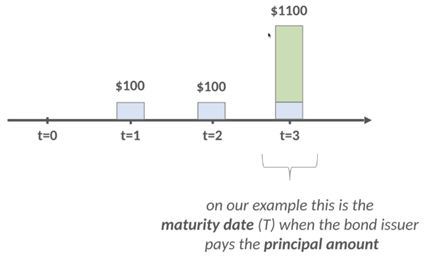

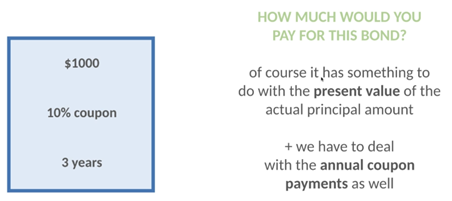

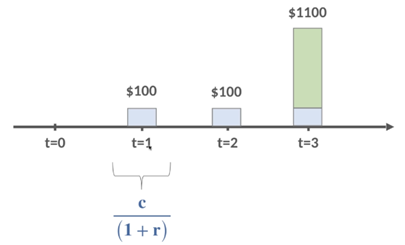

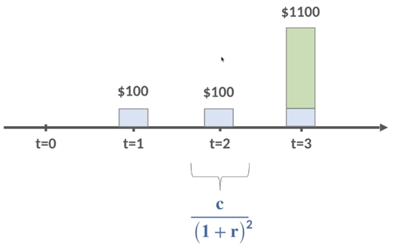

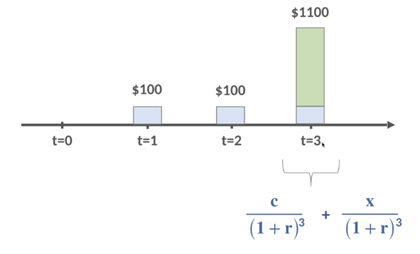

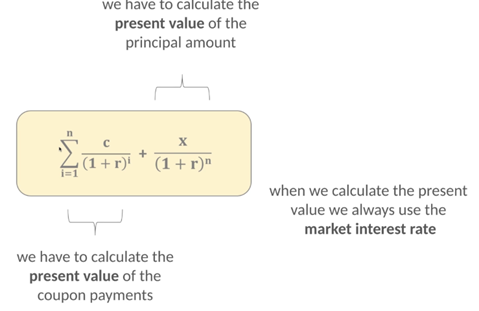

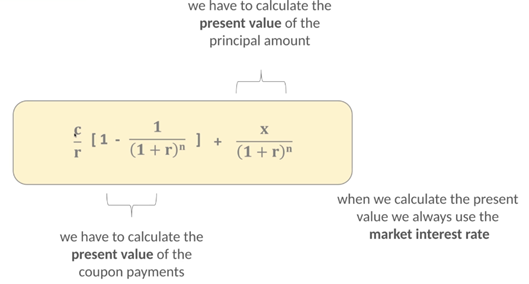

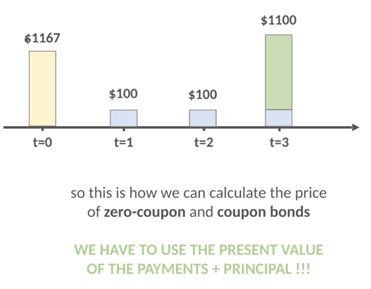

In [217]:
class CouponBond:

    def __init__(self, principal, rate, maturity, interest_rate):
        self.principal = principal
        self.rate = rate / 100
        self.maturity = maturity
        self.interest_rate = interest_rate / 100

    def present_value(self, x, n):
        return x / (1+self.interest_rate)**n

    def calculate_price(self):

        price = 0

        # discount the coupon payments
        for t in range(1, self.maturity+1):
            price = price + self.present_value(self.principal * self.rate, t)

        # discount principle amount
        price = price + self.present_value(self.principal, self.maturity)

        return price
    

bond = CouponBond(1000, 10, 3, 4)
print("Bond price: %.2f" % bond.calculate_price())    

Bond price: 1166.51
